Team Members:\
Aryaman Gokarn(506303588)\
Mugdha Bhagwat(606297799)\
Tania Rajabally(806153219)


# **1. Generating Random Networks**

## 1. Create random networks using Erd¨os-R´enyi (ER) model

### Question 1 (a)

In [ ]:
#Installing the required packages
install.packages("igraph")
install.packages("pracma")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




For p = 0.002 : Mean degree = 1.766667 , Variance = 1.83871 
Theoretical: Mean degree = 1.798 , Variance = 1.794404 



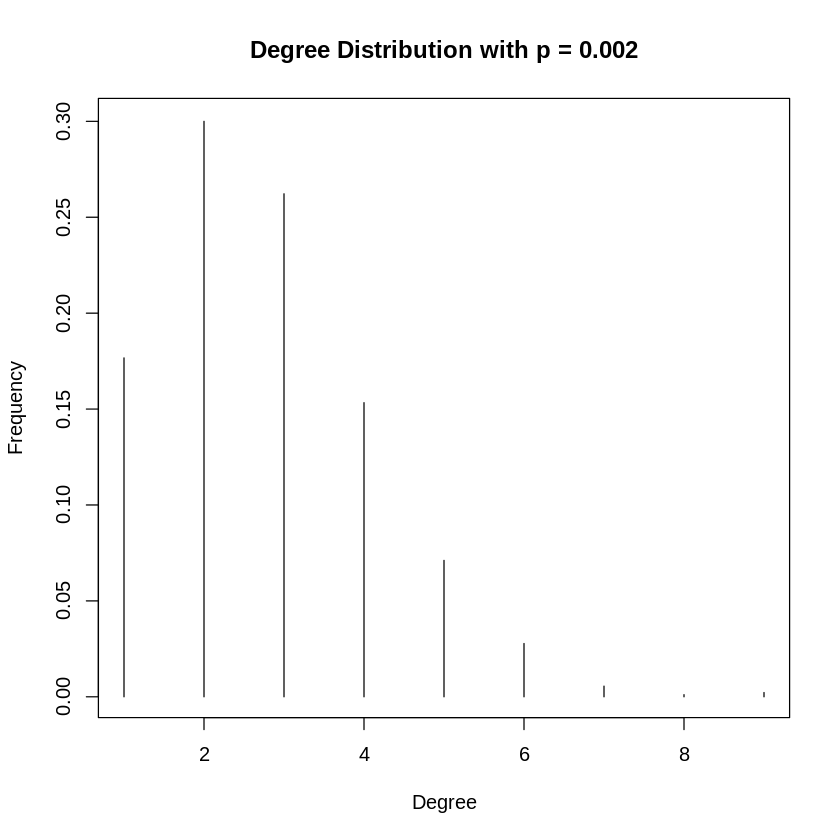

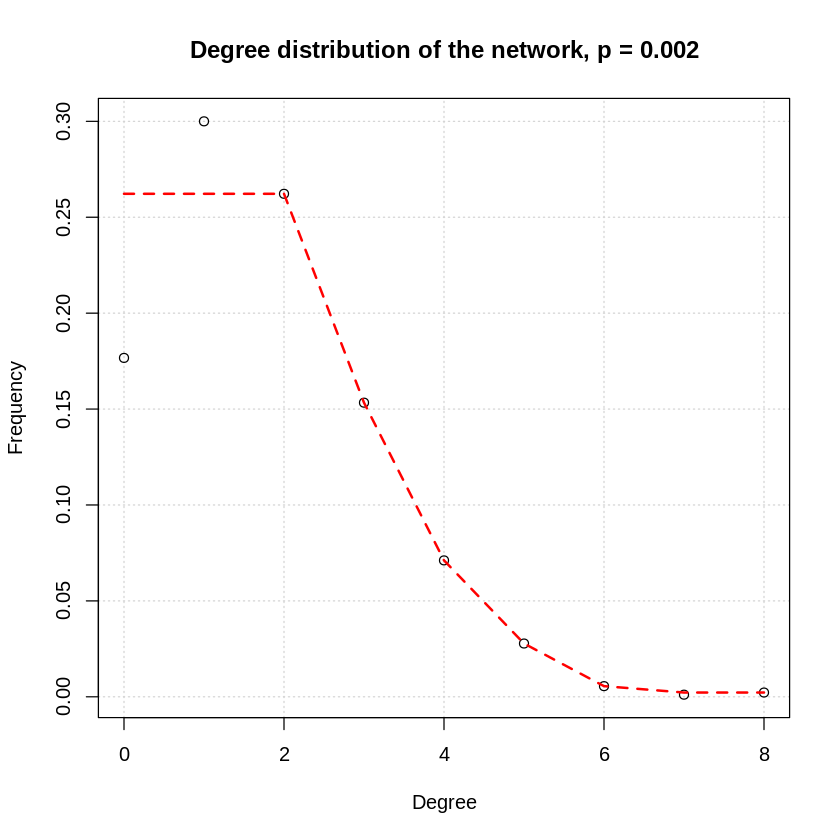

For p = 0.006 : Mean degree = 5.233333 , Variance = 5.249166 
Theoretical: Mean degree = 5.394 , Variance = 5.361636 



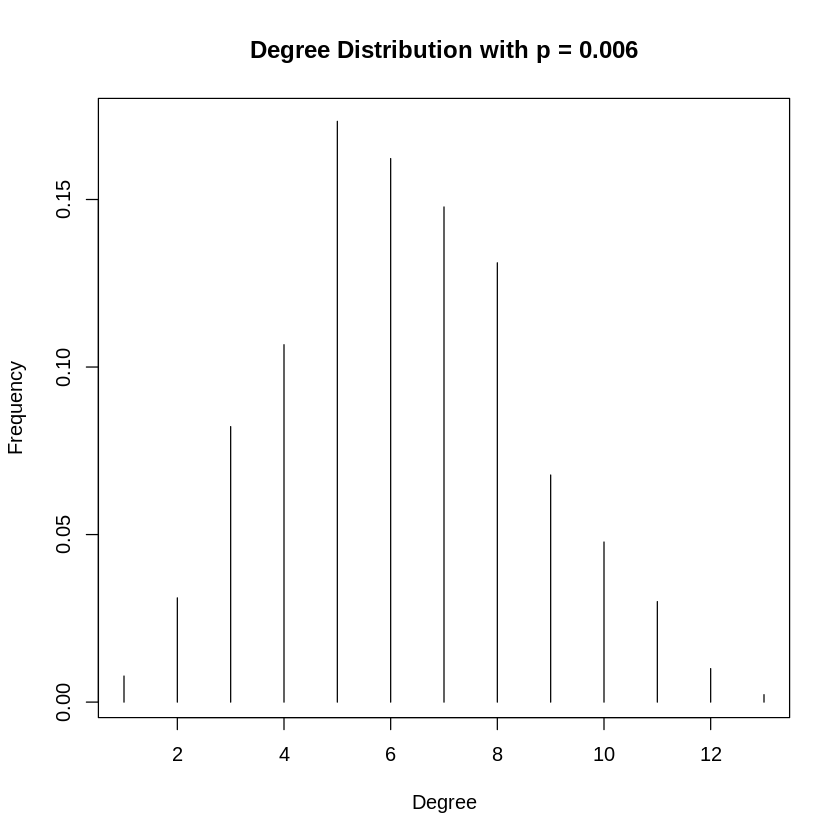

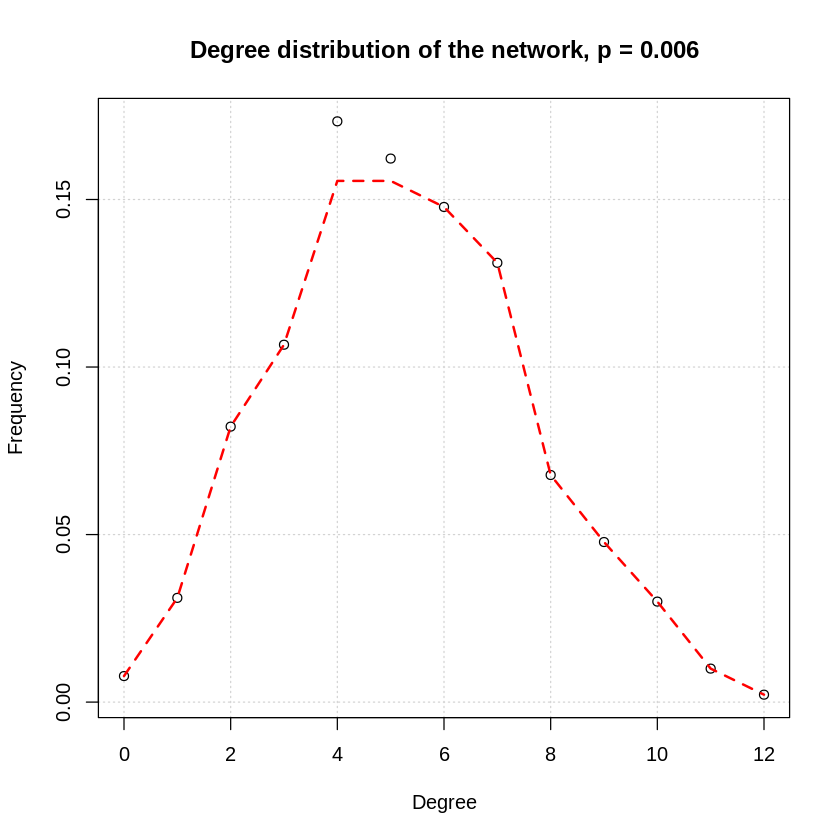

For p = 0.012 : Mean degree = 11.08222 , Variance = 10.46932 
Theoretical: Mean degree = 10.788 , Variance = 10.65854 



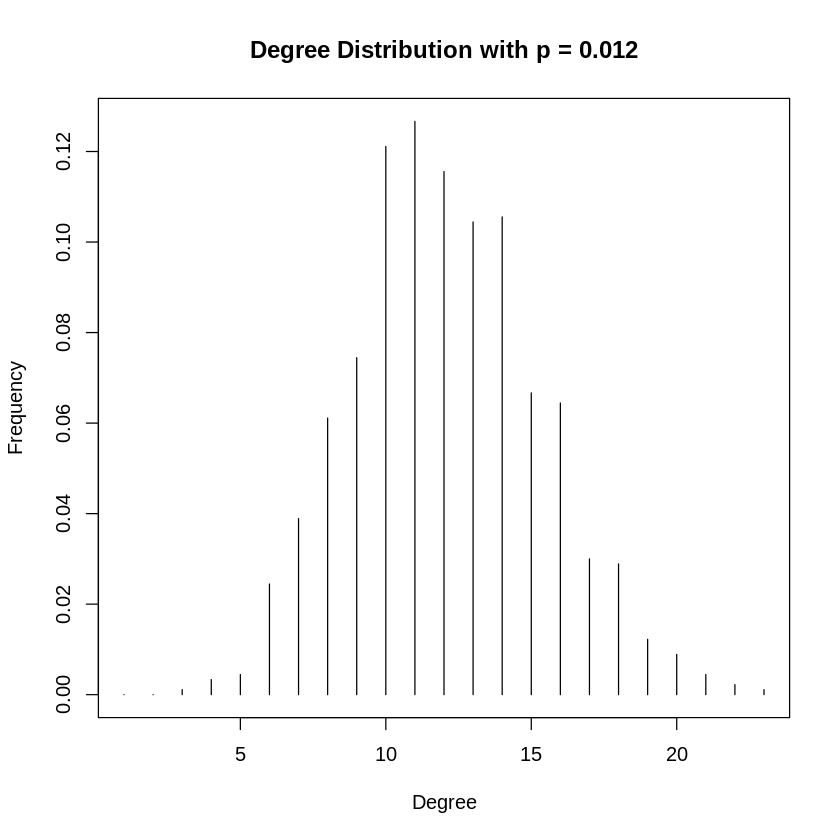

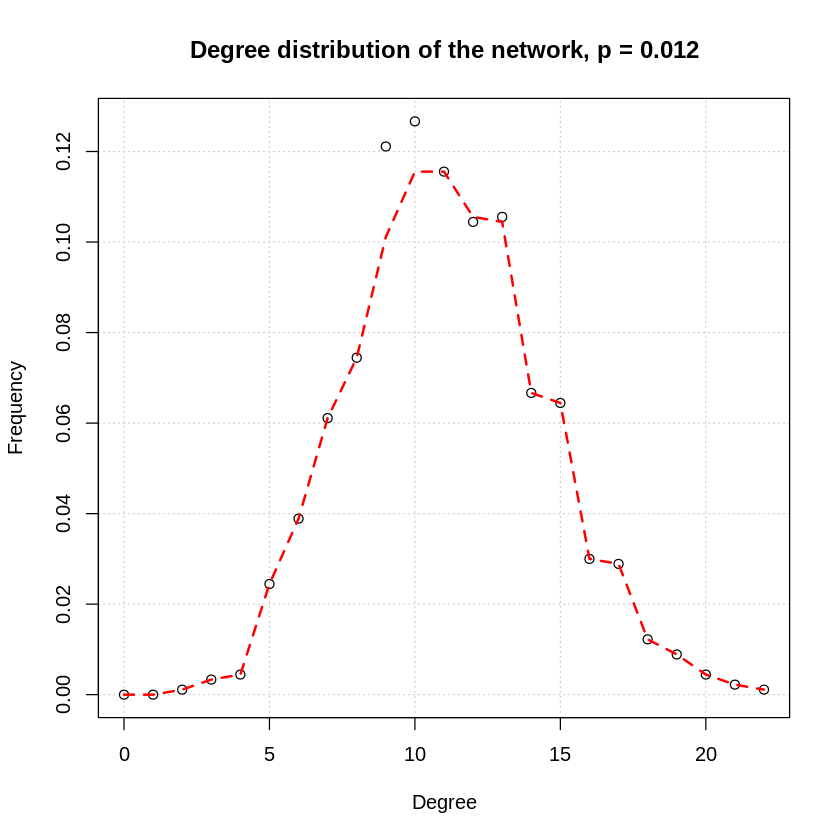

For p = 0.045 : Mean degree = 40.08222 , Variance = 39.19902 
Theoretical: Mean degree = 40.455 , Variance = 38.63452 



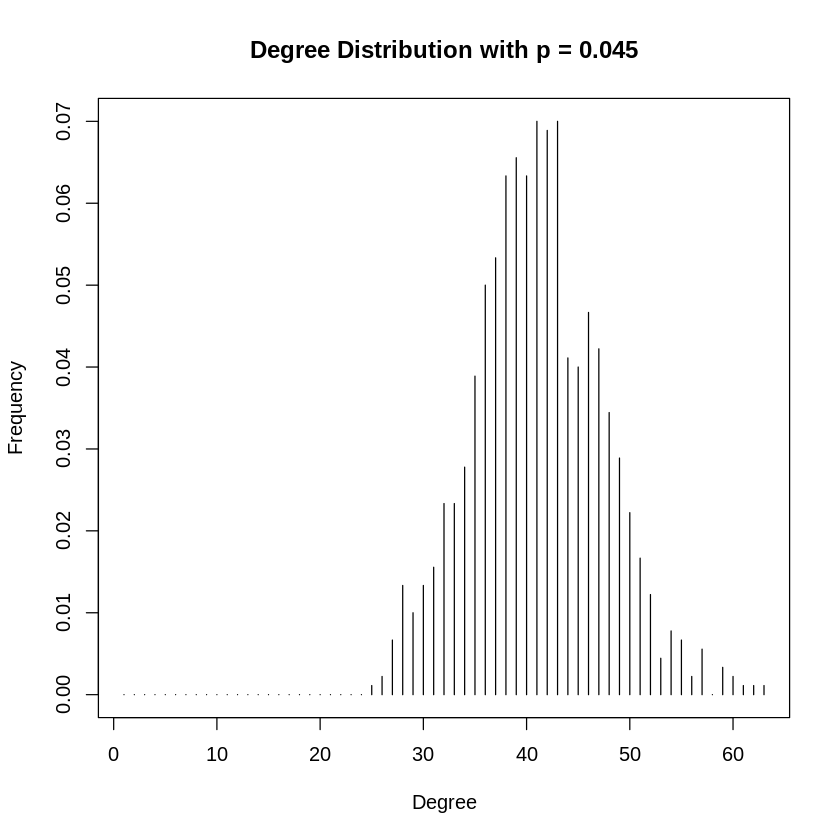

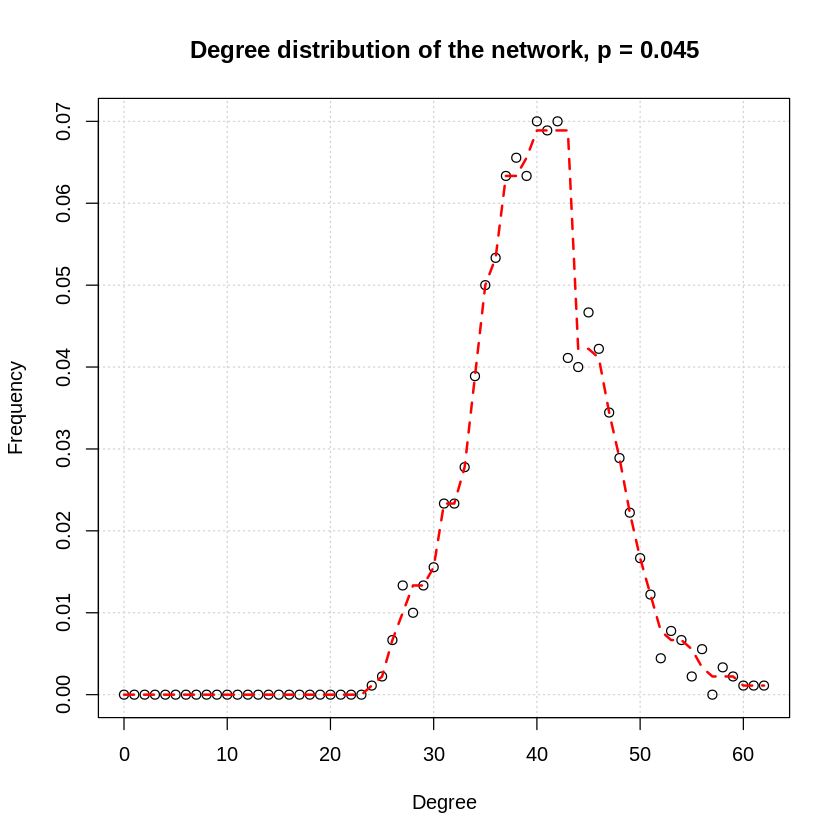

For p = 0.1 : Mean degree = 90.78667 , Variance = 76.88436 
Theoretical: Mean degree = 89.9 , Variance = 80.91 



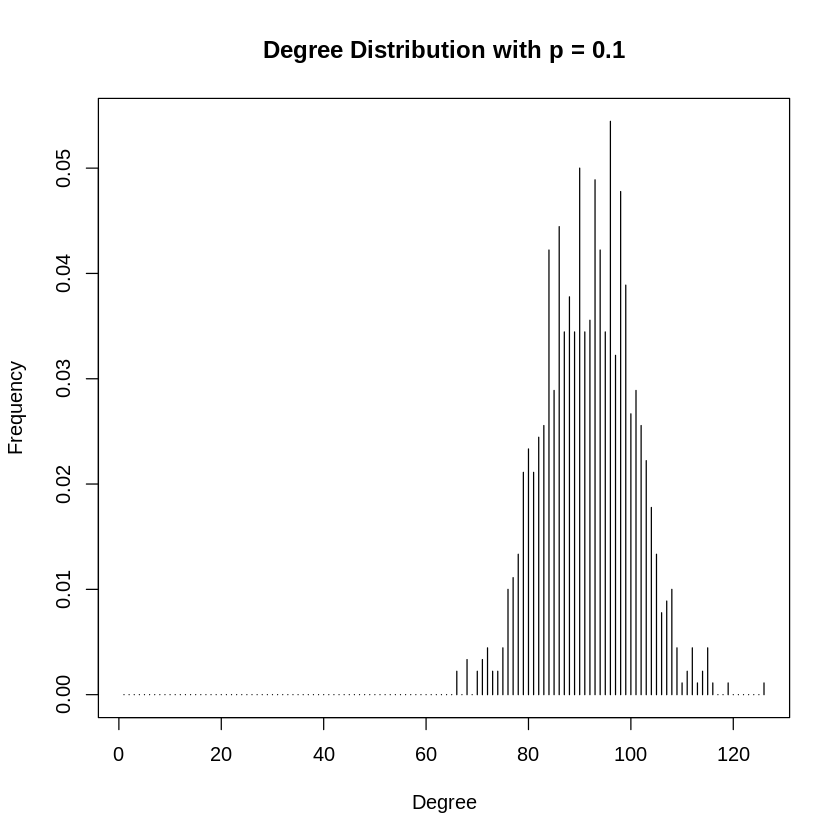

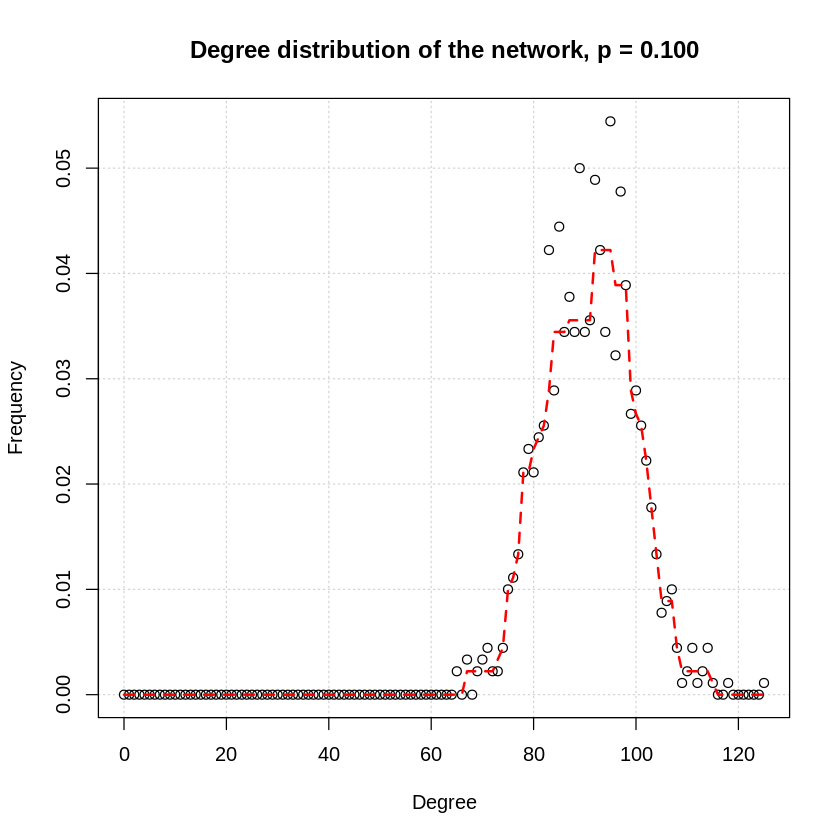

In [ ]:
# Define the parameters for the networks
n <- 900  # number of nodes
p_values <- c(0.002, 0.006, 0.012, 0.045, 0.1)  # probabilities of drawing an edge

# Function to generate network, plot degree distribution, and calculate mean and variance
generate_and_analyze_network <- function(p) {
  g <- erdos.renyi.game(n, p, type = "gnp", directed = FALSE)

  # Plot the degree distribution
  deg_dist <- degree_distribution(g, cumulative = FALSE)
  plot(deg_dist, main = paste("Degree Distribution with p =", p), xlab = "Degree", ylab = "Frequency", type = "h")

  # Calculate mean and variance of the degree
  deg <- degree(g)
  mean_deg <- mean(deg)
  var_deg <- var(deg)

  cat("For p =", p, ": Mean degree =", mean_deg, ", Variance =", var_deg, "\n")

  # Compare to theoretical values
  theoretical_mean <- (n - 1) * p
  theoretical_var <- (n - 1) * p * (1 - p)
  cat("Theoretical: Mean degree =", theoretical_mean, ", Variance =", theoretical_var, "\n\n")

  plot(seq_along(degree_distribution(g)) - 1, degree.distribution(g),
         main=sprintf("Degree distribution of the network, p = %0.3f",p),xlab="Degree",ylab="Frequency",grid())
  lines(seq_along(degree.distribution(g)) - 1, smooth(degree.distribution(g),kind = '3RS3R'),lwd = 2,col='red',lty=2)
}

# Analyze networks for each probability
for(p in p_values) {
  generate_and_analyze_network(p)
}

(a) Create undirected random networks with n = 900 nodes, and the probability p for
drawing an edge between two arbitrary vertices 0.002, 0.006, 0.012, 0.045, and 0.1.
Plot the degree distributions. What distribution (linear/exponential/gaussian/binomial
or something else) is observed? Explain why. Also, report the mean and variance of
the degree distributions and compare them to the theoretical values.
Hint Useful function(s): samplegnp (erdos.renyi.game) , degree ,
degreedistribution , plot

> The figures above show the degree distributions. The degree distribution follows a Poisson distribution. The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space. In the context of random networks, it describes the probability distribution of node degrees. In Erdős-Rényi random graphs, where edges are added independently with a fixed probability p, the degree distribution tends to follow a Poisson distribution when the number of nodes n is large and p is not too small. This is because each node independently forms connections with other nodes, leading to a distribution where the probability of having k connections (degree) follows a Poisson distribution. The Poisson distribution is characterized by its mean λ, which represents the average number of connections per node in the network. As n becomes large and p is not too small, the mean degree λ of the Poisson distribution is approximately equal to np. The observed degree distribution in Erdős-Rényi random networks with sufficiently large n and moderate p is Poisson, where the mean degree λ is proportional to np.

> For p = 0.002 :\
Mean degree = 1.766667 , Variance = 1.83871\
Theoretical: Mean degree = 1.798 , Variance = 1.794404

> For p = 0.006 :\
Mean degree = 5.233333 , Variance = 5.249166\
Theoretical: Mean degree = 5.394 , Variance = 5.361636

> For p = 0.012 :\
Mean degree = 11.08222 , Variance = 10.46932\
Theoretical: Mean degree = 10.788 , Variance = 10.65854

> For p = 0.045 :\
Mean degree = 40.08222 , Variance = 39.19902\
Theoretical: Mean degree = 40.455 , Variance = 38.63452

> For p = 0.1 :\
Mean degree = 90.78667 , Variance = 76.88436\
Theoretical: Mean degree = 89.9 , Variance = 80.91

> We can see that the theoretical and experimental values of the mean and variance are in close agreement with each other.

### Question 1 (b)

In [ ]:
# Parameters
n <- 900
p_values <- c(0.002, 0.006, 0.012, 0.045, 0.1)
num_simulations <- 100  # Number of simulations to estimate connectivity probability

# Function to estimate connectivity probability
estimate_connectivity <- function(p) {
  connected_count <- 0

  for (i in 1:num_simulations) {
    g <- erdos.renyi.game(n, p, type = "gnp", directed = FALSE)
    if (is_connected(g)) {
      connected_count <- connected_count + 1
    }
  }

  probability_connected <- connected_count / num_simulations
  cat("For p =", p, ": Probability that a network is connected =", probability_connected, "\n")
}

# Function to analyze GCC and diameter
analyze_gcc <- function(p) {
  g <- erdos.renyi.game(n, p, type = "gnp", directed = FALSE)
  # Calculate properties of the giant connected component (GCC)
  g.components <- components(g)
  ix <- which.max(g.components$csize)
  g.giant <- induced_subgraph(g, which(g.components$membership == ix))

  # Print properties of the GCC
  cat(sprintf("Is the graph connected : %s\n", is_connected(g)))
  cat(sprintf("The number of nodes of the GCC are %d\n", vcount(g.giant)))
  cat(sprintf("The number of edges of the GCC are %d\n", ecount(g.giant)))
  cat(sprintf("The diameter of the GCC is %f\n", diameter(g.giant)))

}

# Estimate connectivity and analyze GCC for each p
for (p in p_values) {
  estimate_connectivity(p)
  analyze_gcc(p)
}

For p = 0.002 : Probability that a network is connected = 0 
Is the graph connected : FALSE
The number of nodes of the GCC are 696
The number of edges of the GCC are 798
The diameter of the GCC is 25.000000
For p = 0.006 : Probability that a network is connected = 0.03 
Is the graph connected : FALSE
The number of nodes of the GCC are 894
The number of edges of the GCC are 2417
The diameter of the GCC is 9.000000
For p = 0.012 : Probability that a network is connected = 1 
Is the graph connected : TRUE
The number of nodes of the GCC are 900
The number of edges of the GCC are 4861
The diameter of the GCC is 5.000000
For p = 0.045 : Probability that a network is connected = 1 
Is the graph connected : TRUE
The number of nodes of the GCC are 900
The number of edges of the GCC are 18276
The diameter of the GCC is 3.000000
For p = 0.1 : Probability that a network is connected = 1 
Is the graph connected : TRUE
The number of nodes of the GCC are 900
The number of edges of the GCC are 40585
T

(b) For each p and n = 900, answer the following questions:
Are all random realizations of the ER network connected? Numerically estimate the
probability that a generated network is connected. For one instance of the networks
with that p, find the giant connected component (GCC) if not connected. What is
the diameter of the GCC?
Hint Useful function(s): isconnected , clusters , diameter


> We obtained the values as below:\

>For p = 0.002 :
Probability that a network is connected = 0\
Is the graph connected : FALSE\
The number of nodes of the GCC are 696\
The number of edges of the GCC are 798\
The diameter of the GCC is 25.000000

>For p = 0.006 :\
Probability that a network is connected = 0.03\
Is the graph connected : FALSE\
The number of nodes of the GCC are 894\
The number of edges of the GCC are 2417\
The diameter of the GCC is 9.000000

> For p = 0.012 :\
Probability that a network is connected = 1\
Is the graph connected : TRUE\
The number of nodes of the GCC are 900\
The number of edges of the GCC are 4861\
The diameter of the GCC is 5.000000

>For p = 0.045 :\
Probability that a network is connected = 1\
Is the graph connected : TRUE\
The number of nodes of the GCC are 900\
The number of edges of the GCC are 18276\
The diameter of the GCC is 3.000000

> For p = 0.1 :\
Probability that a network is connected = 1\
Is the graph connected : TRUE\
The number of nodes of the GCC are 900\
The number of edges of the GCC are 40585\
The diameter of the GCC is 3.000000

### Question 1 (c)

[1] "p at which GCC starts to emerge: 0.001224"
[1] "p at which 99 percent nodes belong to GCC: 0.007551"


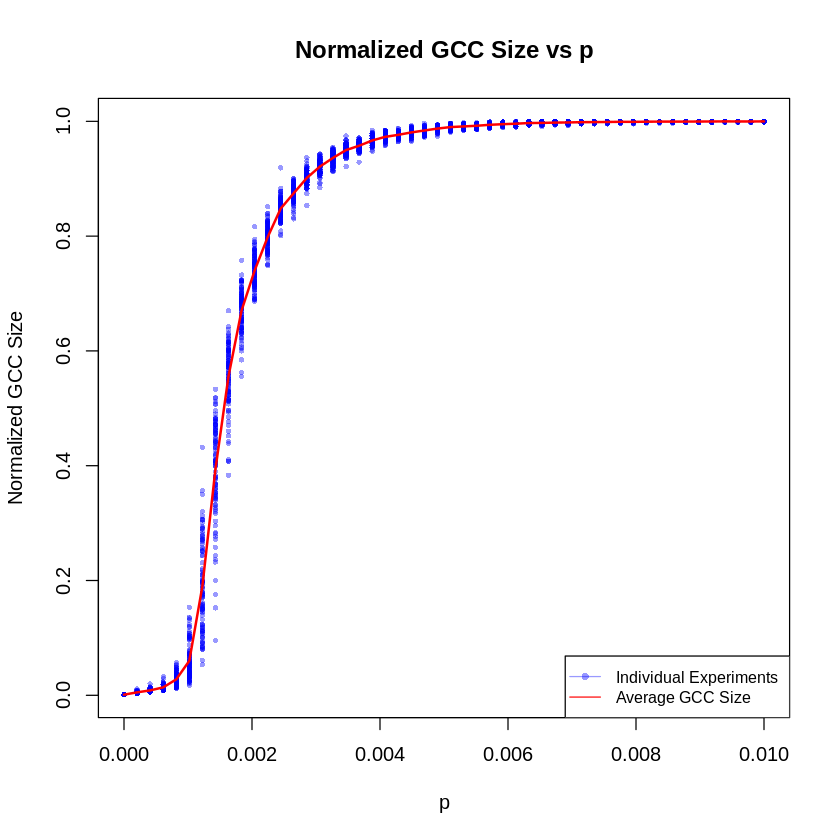

In [ ]:
# Parameters
n <- 900
num_simulations <- 100
p_values <- seq(0, 0.01, length.out = 50) # Adjust based on your estimation for pmax
normalized_gcc_sizes <- numeric(length(p_values))

# Storage for scatter plot data
scatter_data <- data.frame(p=numeric(), gcc_size=numeric())

# Sweep over p values
for (i in seq_along(p_values)) {
  p <- p_values[i]
  gcc_sizes <- numeric(num_simulations)

  for (j in 1:num_simulations) {
    g <- erdos.renyi.game(n, p, type = "gnp", directed = FALSE)
    comps <- clusters(g)
    gcc_size <- max(comps$csize) / n # Normalize by total number of nodes
    gcc_sizes[j] <- gcc_size

    # Store data for scatter plot
    scatter_data <- rbind(scatter_data, data.frame(p=p, gcc_size=gcc_size))
  }

  normalized_gcc_sizes[i] <- mean(gcc_sizes)
}

# Plotting
plot(scatter_data$p, scatter_data$gcc_size,
     xlab = "p", ylab = "Normalized GCC Size",
     main = "Normalized GCC Size vs p",
     col = rgb(0, 0, 1, 0.4), pch = 16, cex = 0.6)
lines(p_values, normalized_gcc_sizes, type="l", col="red", lwd=2)

# Annotations for clarity
legend("bottomright", legend=c("Individual Experiments", "Average GCC Size"),
       col=c(rgb(0, 0, 1, 0.4), "red"), lty=1:1, cex=0.8, pch=c(16, NA))

print(sprintf("p at which GCC starts to emerge: %f",p_values[min(which(normalized_gcc_sizes>0.1))]))
print(sprintf("p at which 99 percent nodes belong to GCC: %f",p_values[mean(which(normalized_gcc_sizes>0.99))]))

(c) It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of
the total network size) is a highly nonlinear function of p, with interesting properties
occurring for values where p = O(
1
n
) and p = O(
ln n
n
).
For n = 900, sweep over values of p from 0 to a pmax that makes the network almost
surely connected and create 100 random networks for each p. pmax should be roughly
determined by yourself. Then scatter plot the normalized GCC sizes vs p. Plot a line
of the average normalized GCC sizes for each p along with the scatter plot.

> Refer to the plot above.

i. Empirically estimate the value of p where a giant connected component starts to
emerge (define your criterion of “emergence”)? Do they match with theoretical
values mentioned or derived in lectures?

> The value of p where the giant connected component starts to emerge is 0.001224.\
Theoretically the value of p at which GCC starts to appear is given by\
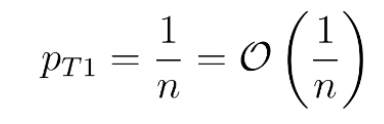\
From the above equation, we can see that for the value n=900, the value of p obtained is 0.001111. Thus we notice that the empirical value is very close to the theoretical value.

ii. Empirically estimate the value of p where the giant connected component takes up over 99% of the nodes in almost every experiment.
> The value of p at which 99 percent nodes belong to GCC is 0.007551.\
Theoretically, the value of p where the expected GCC is almost same as the number of vertices is given by:\
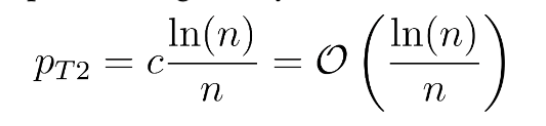\
From the above equation, we obtain the theoretical value of p as 0.00755829 when c=1.00001 and n=900 as mentioned in the question.\
We notice that the experimental value is very close to the theoretical value obtained.

### Question 1 (d)

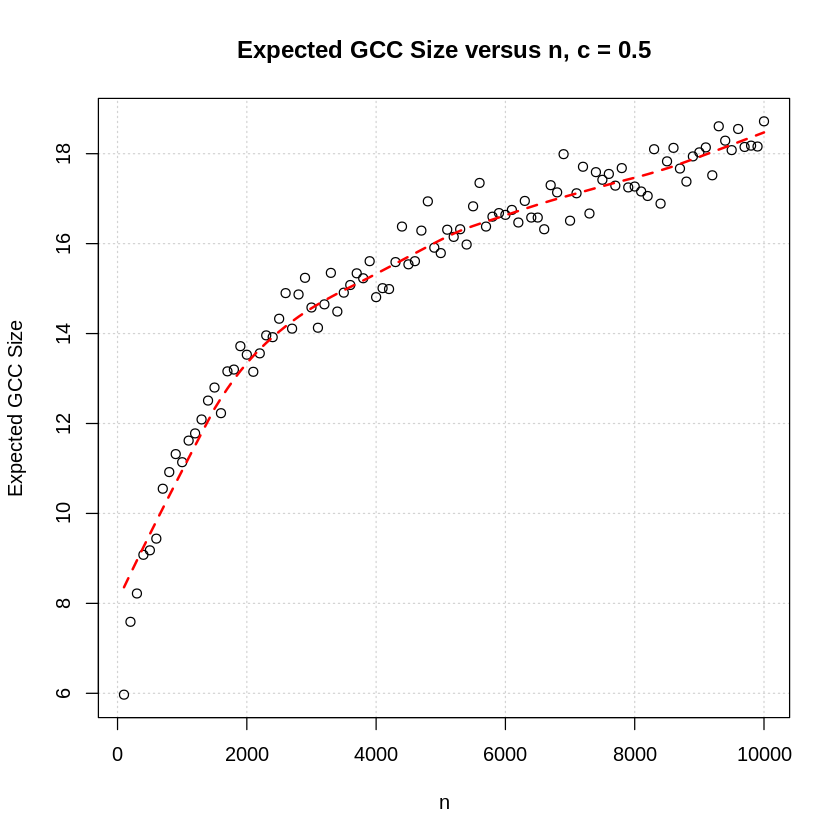

In [ ]:
# Define the parameters with c=0.5
nList <- seq(100,10000,100) # Sweep n from 100 to 10000
q = matrix(data = 0.0, nrow = 100, ncol = length(nList))
r = matrix(data= 0.0, nrow=length(nList),ncol=1)
c = 0.5
j = 1

# Loop over different values of n
for (n in nList){
    for (i in 1:100){
    g <- sample_gnp(n,c/n,directed = FALSE)
    g.components <- clusters(g)
    q[i,j] <- max(g.components$csize)
    }
    r[j] <- mean(q[,j])
    j <- j+1
}

#Plot the graph
plot(nList,r,xlab="n",main = "Expected GCC Size versus n, c = 0.5",ylab="Expected GCC Size",grid())
lines(lowess(nList,r,f = 0.3), col="red",lwd = 2,lty=2)

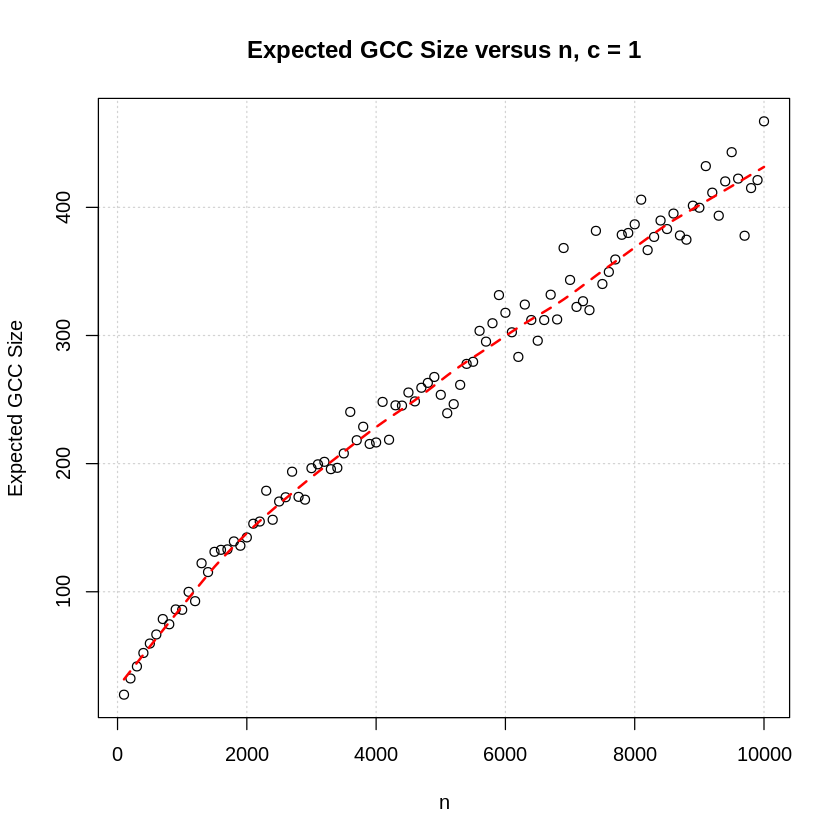

In [ ]:
# Define the parameters with c=1
nList <- seq(100,10000,100) # Sweep n from 100 to 10000
q = matrix(data = 0.0, nrow = 100, ncol = length(nList))
r = matrix(data= 0.0, nrow=length(nList),ncol=1)
c = 1
j = 1

# Loop over different values of n
for (n in nList){
    for (i in 1:100){
    g <- sample_gnp(n,c/n,directed = FALSE)
    g.components <- clusters(g)
    q[i,j] <- max(g.components$csize)
    }
    r[j] <- mean(q[,j])
    j <- j+1
}

#Plot the graph
plot(nList,r,xlab="n",main = "Expected GCC Size versus n, c = 1",ylab="Expected GCC Size",grid())
lines(lowess(nList,r,f = 0.3), col="red",lwd = 2,lty=2)

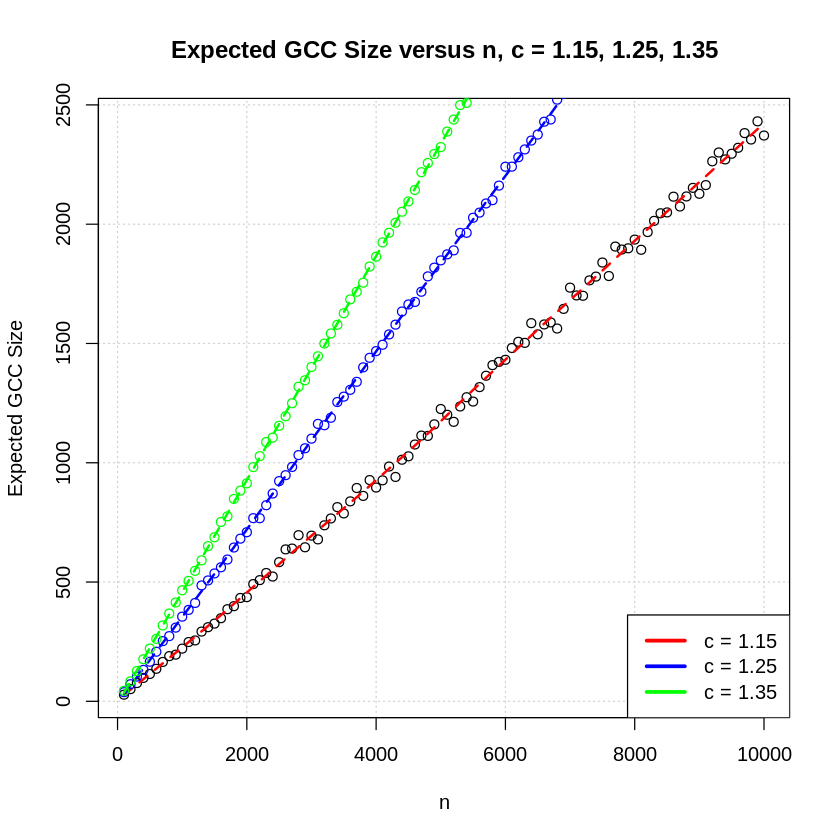

In [ ]:
nList <- seq(100,10000,100) # Sweep n from 100 to 10000

# Define the parameters with c=1.15
q = matrix(data = 0.0, nrow = 100, ncol = length(nList))
r = matrix(data= 0.0, nrow=length(nList),ncol=1)
c = 1.15
j = 1

# Loop over different values of n
for (n in nList){
    for (i in 1:100){
    g <- sample_gnp(n,c/n,directed = FALSE)
    g.components <- clusters(g)
    q[i,j] <- max(g.components$csize)
    }
    r[j] <- mean(q[,j])
    j <- j+1
}

#Plot the graph
plot(nList,r,xlab="n",main = "Expected GCC Size versus n, c = 1.15, 1.25, 1.35",ylab="Expected GCC Size",grid())
lines(lowess(nList,r,f = 0.3), col="red",lwd = 2,lty=2)

# Define the parameters with c=1.25
q = matrix(data = 0.0, nrow = 100, ncol = length(nList))
r = matrix(data= 0.0, nrow=length(nList),ncol=1)
c = 1.25
j = 1

# Loop over different values of n
for (n in nList){
    for (i in 1:100){
    g <- sample_gnp(n,c/n,directed = FALSE)
    g.components <- clusters(g)
    q[i,j] <- max(g.components$csize)
    }
    r[j] <- mean(q[,j])
    j <- j+1
}

#Plot the graph
points(nList,r,xlab="n",col="blue")
lines(lowess(nList,r,f = 0.3), col="blue",lwd = 2,lty=2)

# Define the parameters with c=1.35
q = matrix(data = 0.0, nrow = 100, ncol = length(nList))
r = matrix(data= 0.0, nrow=length(nList),ncol=1)
c = 1.35
j = 1

# Loop over different values of n
for (n in nList){
    for (i in 1:100){
    g <- sample_gnp(n,c/n,directed = FALSE)
    g.components <- clusters(g)
    q[i,j] <- max(g.components$csize)
    }
    r[j] <- mean(q[,j])
    j <- j+1
}

#Plot the graph
points(nList,r,xlab="n",col="green")
lines(lowess(nList,r,f = 0.3), col="green",lwd = 2,lty=2)

legend('bottomright', legend = c("c = 1.15", "c = 1.25", "c = 1.35"),
       lty = c(1, 1, 1), lwd = c(3,3,3),
       col = c('red','blue','green'))

(d) i. Define the average degree of nodes c = n × p = 0.5. Sweep over the number of
nodes, n, ranging from 100 to 10000. Plot the expected size of the GCC of ER
networks with n nodes and edge-formation probabilities p = c/n, as a function
of n. What trend is observed?

> Please refer to the figure above. We see that as n increases, it converges to a constant value, following a natural logarithmic trend. As n increases, since c is constant, p decreases. If np=c<1 then there will be no connected components of size greater then O(ln(n)). For c<1, every connected component in the network has atmost one cycle with the number of vertices growing in a logarithmic function.

ii. Repeat the same for c = 1.
> Refer to the graph above. As expected, as the value of n increases, the expected GCC size increases. We can also see that the range of expected GCC is higher for c=1 as compared to c=0.5. This is because the expected GCC size is dependent on np. Thus, as the average degree of the network increases, the expected GCC size increases.

iii. Repeat the same for values of c = 1.15, 1.25, 1.35, and show the results for these
three values in a single plot.
> Please refer to the figure above. We can see that as n increases, the expected GCC size increases linearly. Also, as the value of c increases, the expected GCC size increases.

iv. What is the relation between the expected GCC size and n in each case?

> We can see that as n increases, the expected GCC size increases linearly. The slope of this linear relationships increases as c increases i.e as c increases (c=np which is the average degree of nodes), it becomes more linear. This is expected because for a given constant n, if c increases, then probability of edge formation p increases. This means that as c increases, more nodes have higher probability to connect and GCC size becomes larger.

## 2. Create networks using preferential attachment model

### Question 2 (a)

Warning message:
“`barabasi.game()` was deprecated in igraph 2.0.0.
ℹ Please use `sample_pa()` instead.”


[1] "Is the network connected? TRUE"


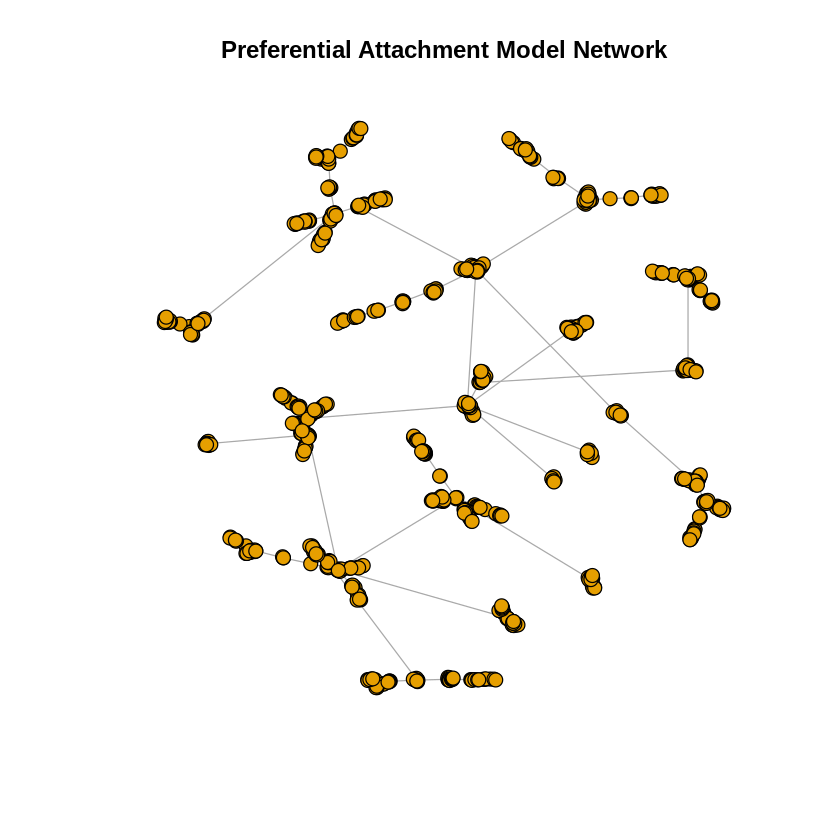

In [ ]:
# Set the seed for reproducibility
set.seed(0)

# Create an undirected network with 1050 nodes using the preferential attachment model
g <- barabasi.game(1050, m = 1, directed = FALSE)

# Check if the network is connected
is_connected <- is_connected(g)

# Plot the network (optional, can be commented out to speed up execution)
plot(g, vertex.size=5, vertex.label=NA, main="Preferential Attachment Model Network")

# Print the result
print(paste("Is the network connected?", is_connected))

In [ ]:
#Code to generate 100 graphs and check if they are connected
count = 0
for (i in 1:100) {
    g <- barabasi.game(1050, m=1, directed=FALSE)
    if (is_connected(g)) {
        count <- count + 1
    }
}
print(sprintf("Total iterations: 100, Connected graphs: %d",count))

[1] "Total iterations: 100, Connected graphs: 100"


(a) Create an undirected network with n = 1050 nodes, with preferential attachment
model, where each new node attaches to m = 1 old nodes. Is such a network always
connected?
Hint Useful function(s): samplepa (barabasi.game)

> Please refer to the figure above. Yes, such a network is always connected. We tried on 100 randomly generated undirected networks and observed that it is always connected.

### Question 2 (b)

Modularity: 0.9359115 
Degree Assortativity: -0.1136649 


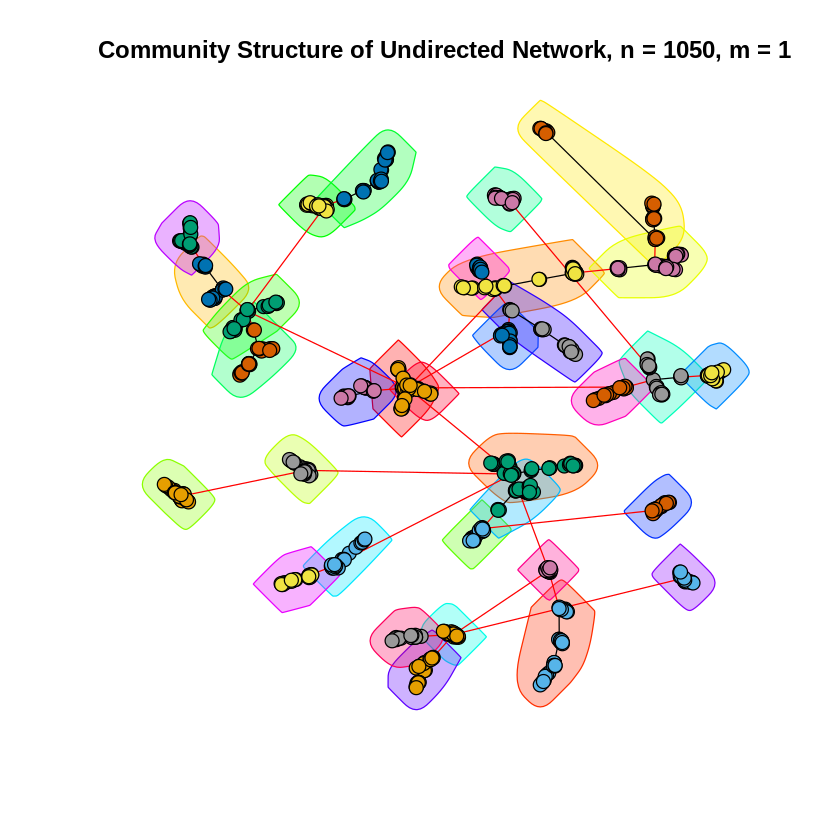

In [ ]:
# 1. Fast Greedy Community Detection
fg_communities <- cluster_fast_greedy(g)
plot(fg_communities, g, vertex.size=5, vertex.label=NA, main="Community Structure of Undirected Network, n = 1050, m = 1")

# 2. Measure Modularity
modularity_value <- modularity(fg_communities)
cat("Modularity:", modularity_value, "\n")

# 3. Compute Assortativity (for example, by degree)
degree_assortativity <- assortativity_degree(g)
cat("Degree Assortativity:", degree_assortativity, "\n")

# If you have a specific attribute for assortativity calculation, use:
# attribute_assortativity <- assortativity(g, attribute_vector, directed = FALSE)
# cat("Attribute Assortativity:", attribute_assortativity, "\n")

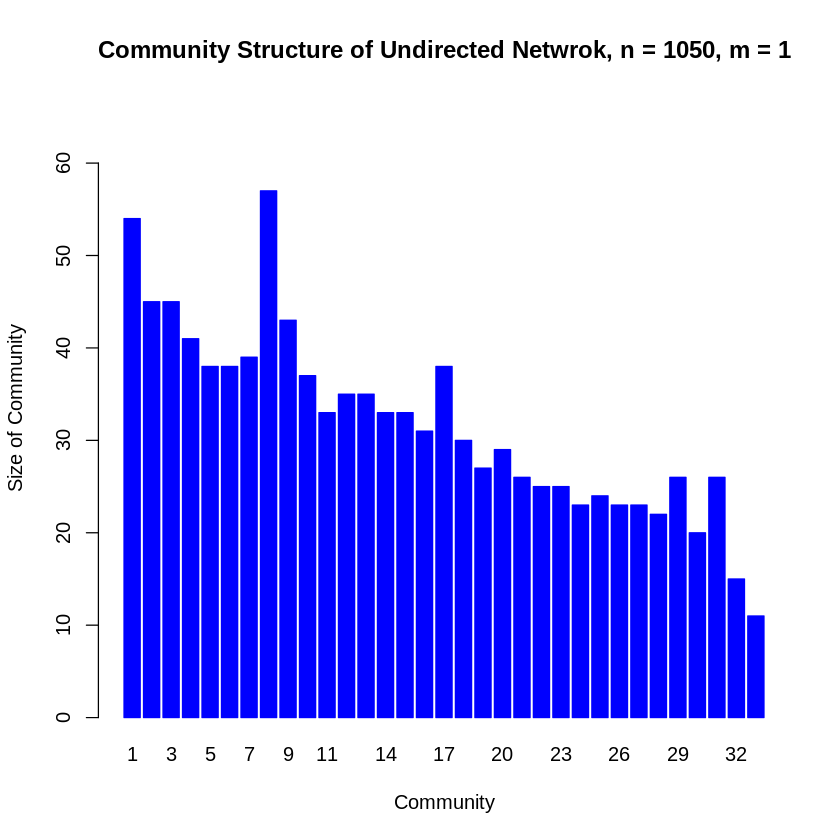

In [ ]:
#Bar plot for the community structure
barplot(as.vector(sizes(fg_communities)),names.arg = seq(1,length(fg_communities),1),main="Community Structure of Undirected Netwrok, n = 1050, m = 1",
   xlab="Community",ylab="Size of Community",ylim=c(0,max(as.vector(sizes(fg_communities)))+10),border="blue",col="blue")

(b) Use fast greedy method to find the community structure. Measure modularity. Define
Assortativity. Compute Assortativity.
Hint Useful function(s): clusterfastgreedy , modularity

> Modularity measures the strength of division of a network into communities. It quantifies the quality of the community structure by comparing the number of edges within communities to the expected number of edges in a random network with the same node degrees.\
Assortativity measures the preference of a network's nodes to attach to others that are similar or dissimilar in some way. In an assortative network, nodes tend to connect to others with similar properties, while in a disassortative network, nodes tend to connect to others with dissimilar properties.\
For the above network, we find the below values:\
Modularity: 0.9359115\
Degree Assortativity: -0.1136649


### Question 2 (c)

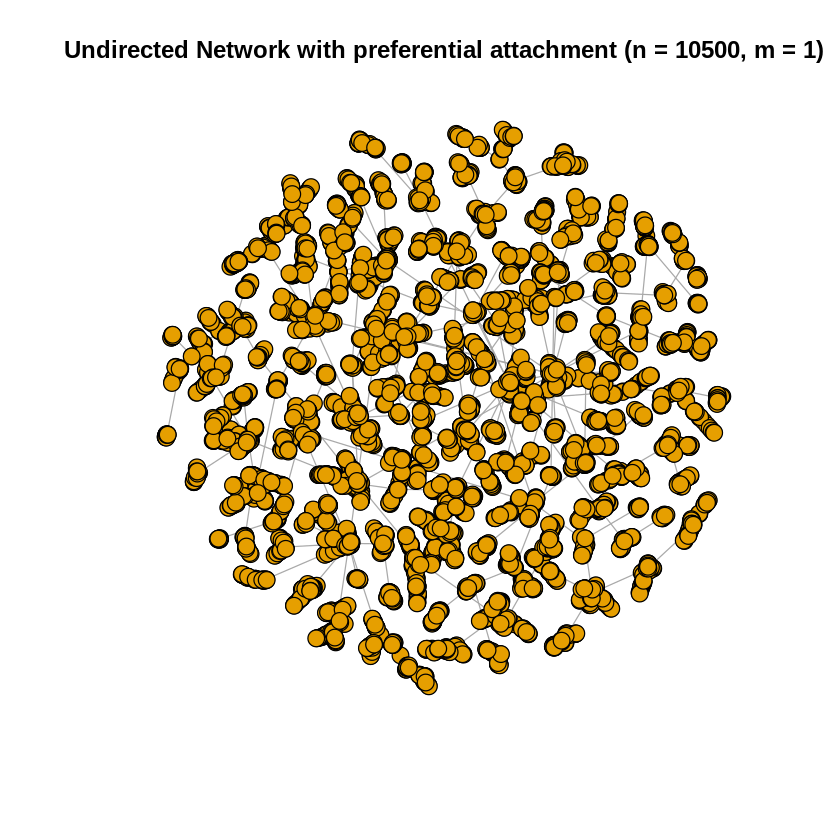

Modularity of Larger Network: 0.9789827 
Assortativity of Larger Network (Degree): -0.03337665 


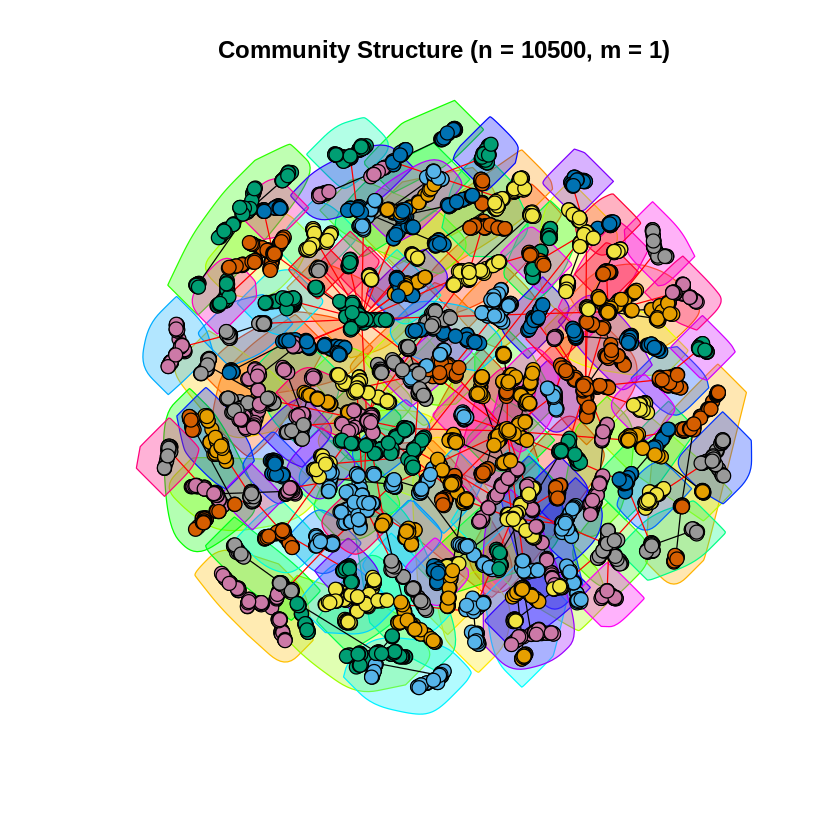

In [ ]:
# Generate larger network with 10,500 nodes using preferential attachment
larger_network <- barabasi.game(10500, m=1, directed=FALSE)

plot(larger_network, vertex.size=6, main = "Undirected Network with preferential attachment (n = 10500, m = 1)", vertex.label="")

fg_communities <- cluster_fast_greedy(larger_network)
plot(fg_communities, larger_network, main="Community Structure (n = 10500, m = 1)", vertex.size=5, vertex.label=NA)

# 2. Measure Modularity
larger_modularity <- modularity(cluster_fast_greedy(larger_network))
cat("Modularity of Larger Network:", larger_modularity, "\n")

# 3. Compute Assortativity (e.g., degree assortativity)
larger_assortativity <- assortativity_degree(larger_network)
cat("Assortativity of Larger Network (Degree):", larger_assortativity, "\n")

(c) Try to generate a larger network with 10500 nodes using the same model. Compute
modularity and assortativity. How is it compared to the smaller network’s modularity?

> Refer to the network above. For this network, we obtain the values as below:\
Modularity of Larger Network: 0.9789827 \
Assortativity of Larger Network (Degree): -0.03337665 \
We can see that there are more communities in a network with larger number of nodes as compared to the network with a smaller number of nodes. The number of vertices are also higher in the larger network. Apart from this, the modularity index is also higher indicating that the larger network is better capable of being partitioned into communities with strong intracommunity connectedness and sparse intercommunity connectedness. The probability of strong intracommunity is higher for larger networks and the likeness of sparsity is also higher for larger networks.

### Question 2 (d)

Estimated slope for n = 1050 : -2.249561 
Estimated slope for n = 10500 : -2.40196 


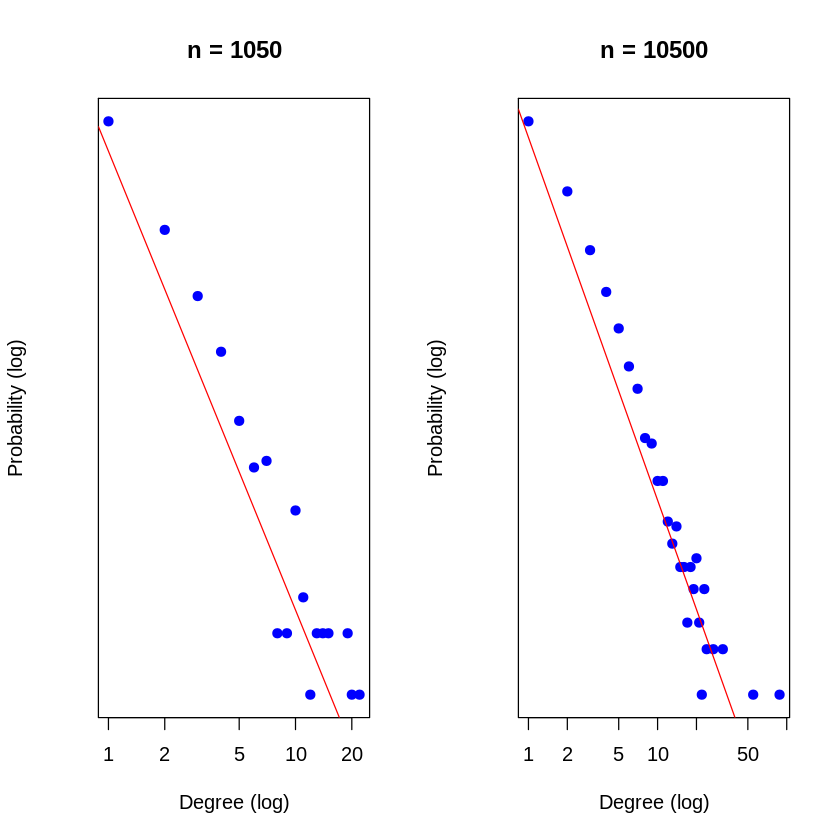

In [ ]:
#CHECK WHICH ONE OUT OF THE 2 IS BETTER. THIS OR NEXT CELL
# Function to plot degree distribution and estimate slope
plot_degree_distribution <- function(network, title) {
  deg <- degree(network, mode="all")
  deg.distribution <- table(deg)/length(deg)
  deg.distribution <- deg.distribution[deg.distribution > 0]

  plot(names(deg.distribution), deg.distribution,
       log="xy", xlab="Degree (log)", ylab="Probability (log)",
       main=title, pch=19, col="blue")

  # Linear regression to estimate the slope
  fit <- lm(log(deg.distribution) ~ log(as.numeric(names(deg.distribution))))
  abline(fit, col="red")

  cat("Estimated slope for", title, ":", coef(fit)[2], "\n")
}

# Generate networks
g1 <- barabasi.game(1050, m=1, directed=FALSE)
g2 <- barabasi.game(10500, m=1, directed=FALSE)

# Plot degree distribution and estimate slope
par(mfrow=c(1, 2)) # Plot side by side
plot_degree_distribution(g1, "n = 1050")
plot_degree_distribution(g2, "n = 10500")

(d) Plot the degree distribution in a log-log scale for both n = 1050, 10500, then estimate
the slope of the plot using linear regression.

> Please refer to the graphs above.\
Estimated slope for n = 1050 : -2.249561\
Estimated slope for n = 10500 : -2.40196\
We can see that larger networks follow power law distribution more closely than smaller ones.

### Question 2 (e)

Estimated slope for neighbors in Network n = 1050 : -1.194989 
Estimated slope for neighbors in Network n = 10500 : -1.442518 


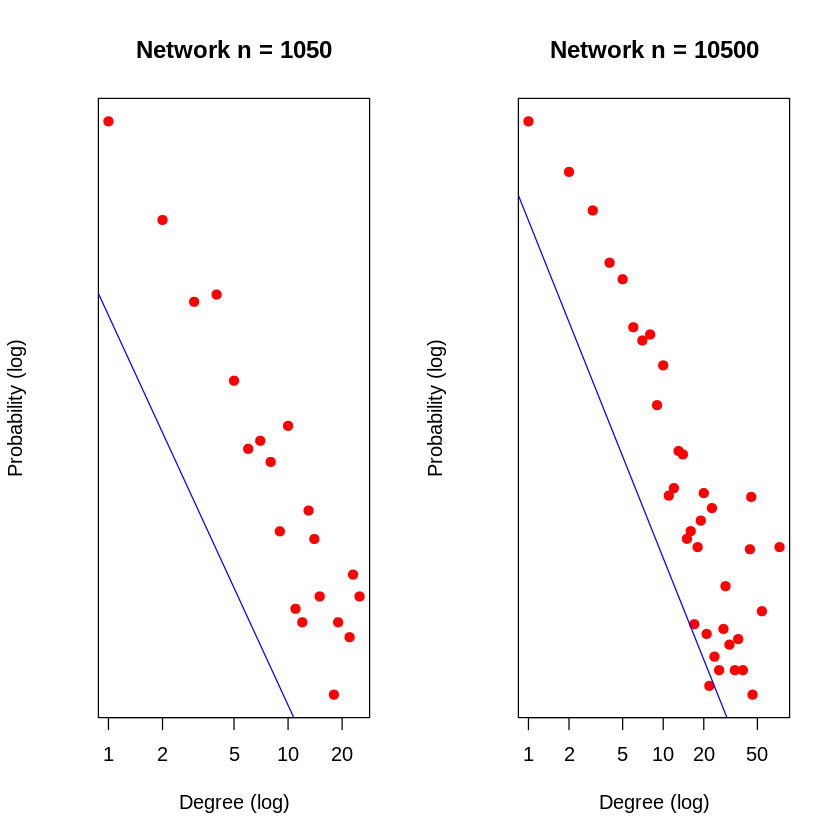

In [ ]:
# Function to sample neighbors and plot degree distribution
sample_and_plot_neighbors <- function(network, title) {
  degrees <- numeric()  # To store degrees of randomly picked neighbors

  for (i in 1:vcount(network)) {
    neighbors <- neighbors(network, i)
    if (length(neighbors) > 0) {
      j <- sample(neighbors, 1)
      degrees <- c(degrees, degree(network, j))
    }
  }

  deg.distribution <- table(degrees)/length(degrees)
  deg.distribution <- deg.distribution[deg.distribution > 0]

  plot(names(deg.distribution), deg.distribution,
       log="xy", xlab="Degree (log)", ylab="Probability (log)",
       main=title, pch=19, col="red")

  # Linear regression to estimate the slope
  fit <- lm(log(deg.distribution) ~ log(as.numeric(names(deg.distribution))))
  abline(fit, col="blue")

  cat("Estimated slope for neighbors in", title, ":", coef(fit)[2], "\n")
}

# Generate networks (if not already generated)
g1 <- barabasi.game(1050, m=1, directed=FALSE)
g2 <- barabasi.game(10500, m=1, directed=FALSE)

# Plot degree distribution of neighbors
par(mfrow=c(1, 2)) # Plot side by side
sample_and_plot_neighbors(g1, "Network n = 1050")
sample_and_plot_neighbors(g2, "Network n = 10500")

(e) In the two networks generated in 2(a) and 2(c), perform the following:
Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the
degree distribution of nodes j that are picked with this process, in the log-log scale.
Is the distribution linear in the log-log scale? If so, what is the slope? How does this
differ from the node degree distribution?
Hint Useful function(s): sample

> Refer to the plots above. We can see that both the distributions are linear. The slopes are:\
Estimated slope for neighbors in Network n = 1050 : -1.194989\
Estimated slope for neighbors in Network n = 10500 : -1.442518\
Random sampling only one neighbour does not follow the node degree distribution. It can be observed that although the slope is negative and decreases and n decreases, the degree distribution of the random node selection does not follow the power law distribution of the Barabasi Model having an exponent of 3. Since we are sampling one node at random, both the expected degree and variance are unbounded. Thus, the degree distribution will change more slowly compared to node degree distribution where the gradient is in the range of 2 to 3 and the expected degree is bounded.

### Question 2 (f)

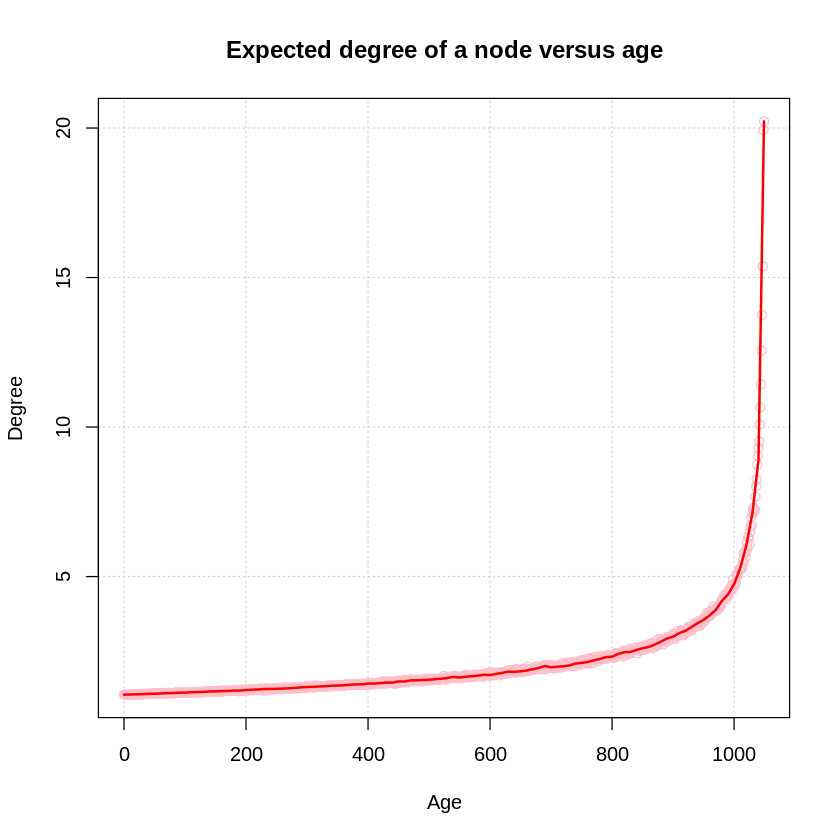

In [ ]:
#Creating a matrix to store the degree age
deg_age = matrix(data=0.0,nrow = 1050,ncol=1)
for (i in 1:1050) {
    g <- barabasi.game(1050, m=1, directed=FALSE)
    deg_age = deg_age+degree(g)
}
deg_age = deg_age/1000
plot(seq(1049,0,-1),deg_age,col='pink',ylab="Degree",xlab="Age",main="Expected degree of a node versus age",grid())
lines(lowess(seq(1049,0,-1),deg_age,f = 0.01), col="red",lwd = 2)

(f) Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1050.
Show the relationship between the age of nodes and their expected degree through
an appropriate plot. Note that the newest added node is the youngest.

> Refer to the figure above. We can see that the expected degree of a node increases monotonically as its age increases. This is expected because in preferential ttachment models, nodes with higher degrees or connectedness are more likely to receive edges with newer nodes. Since older nodes are more likely to be connected to newer nodes with time, the degree of older nodes increases with time.

### Question 2 (g)

For m=2

[1] "Is the network connected? TRUE"


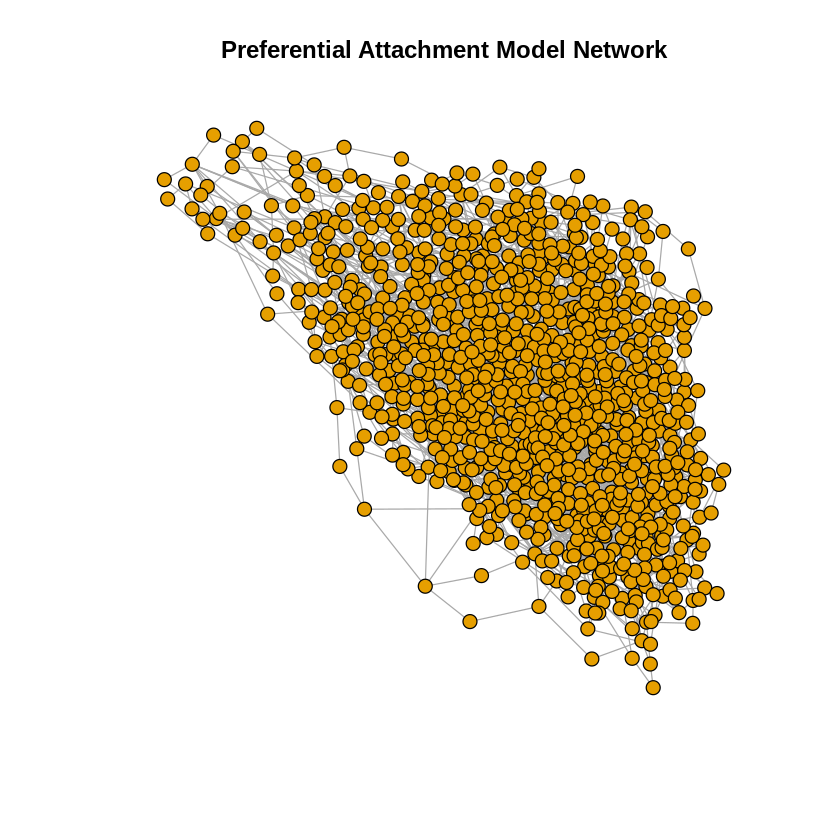

In [ ]:
#For m=2
# Set the seed for reproducibility
set.seed(0)

# Create an undirected network with 1050 nodes using the preferential attachment model
g <- barabasi.game(1050, m = 2, directed = FALSE)

# Check if the network is connected
is_connected <- is_connected(g)

# Plot the network (optional, can be commented out to speed up execution)
plot(g, vertex.size=5, vertex.label=NA, main="Preferential Attachment Model Network")

# Print the result
print(paste("Is the network connected?", is_connected))

In [ ]:
#Code to generate 100 graphs and check if they are connected
count = 0
for (i in 1:100) {
    g <- barabasi.game(1050, m=2, directed=FALSE)
    if (is_connected(g)) {
        count <- count + 1
    }
}
print(sprintf("Total iterations: 100, Connected graphs: %d",count))

[1] "Total iterations: 100, Connected graphs: 100"


Modularity: 0.5217184 
Degree Assortativity: -0.04428939 


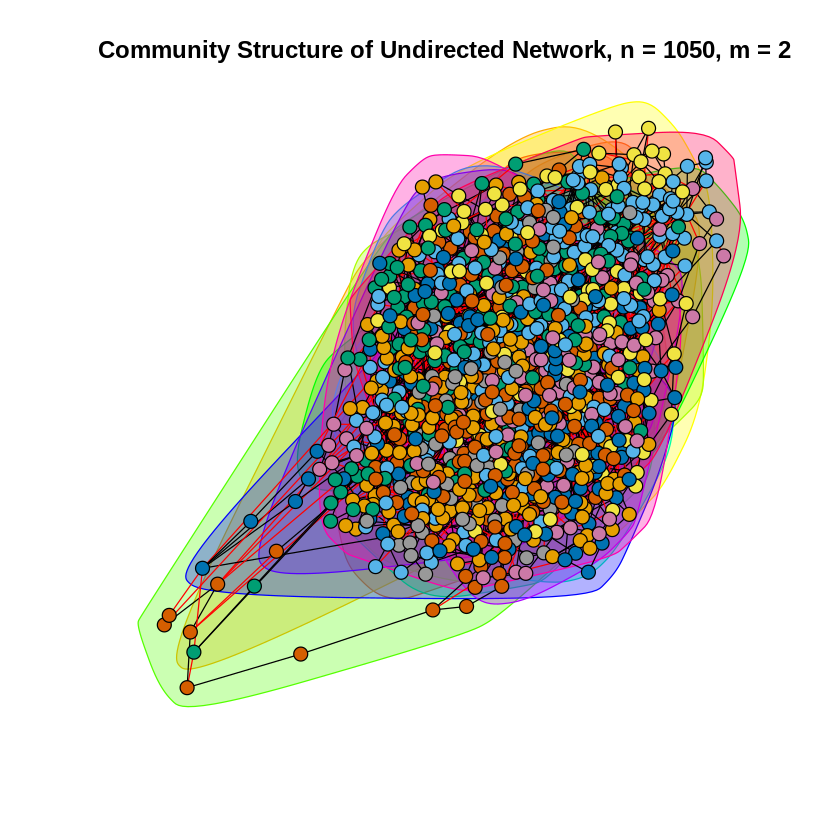

In [ ]:
# 1. Fast Greedy Community Detection
fg_communities <- cluster_fast_greedy(g)
plot(fg_communities, g, vertex.size=5, vertex.label=NA, main="Community Structure of Undirected Network, n = 1050, m = 2")

# 2. Measure Modularity
modularity_value <- modularity(fg_communities)
cat("Modularity:", modularity_value, "\n")

# 3. Compute Assortativity (for example, by degree)
degree_assortativity <- assortativity_degree(g)
cat("Degree Assortativity:", degree_assortativity, "\n")

# If you have a specific attribute for assortativity calculation, use:
# attribute_assortativity <- assortativity(g, attribute_vector, directed = FALSE)
# cat("Attribute Assortativity:", attribute_assortativity, "\n")

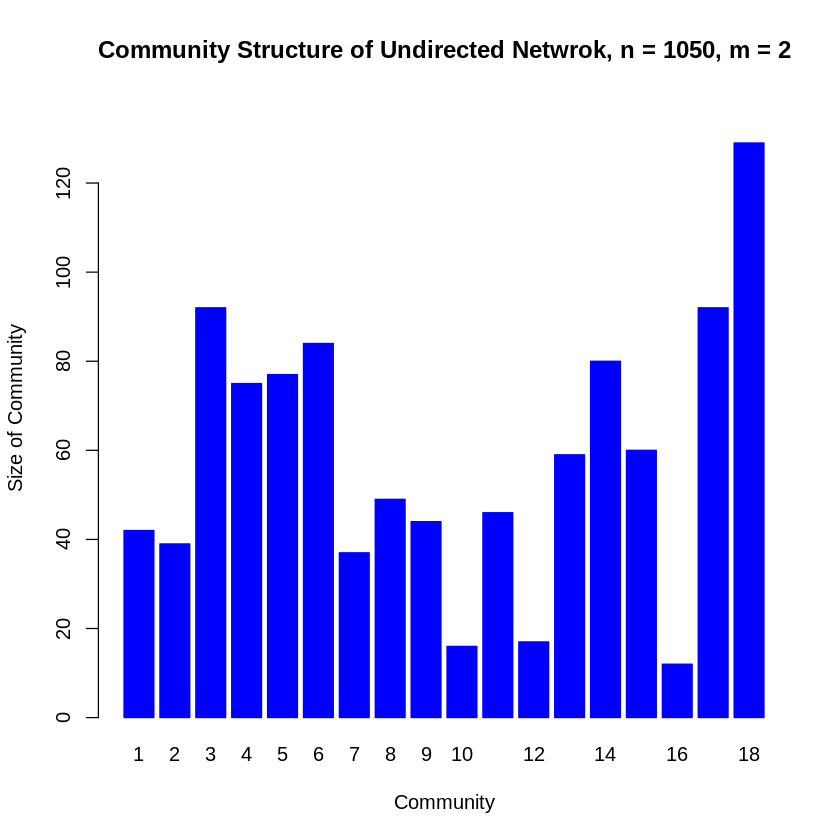

In [ ]:
#Bar plot for the community structure
barplot(as.vector(sizes(fg_communities)),names.arg = seq(1,length(fg_communities),1),main="Community Structure of Undirected Netwrok, n = 1050, m = 2",
   xlab="Community",ylab="Size of Community",ylim=c(0,max(as.vector(sizes(fg_communities)))+10),border="blue",col="blue")

Modularity of Larger Network: 0.5322066 
Assortativity of Larger Network (Degree): -0.00721725 


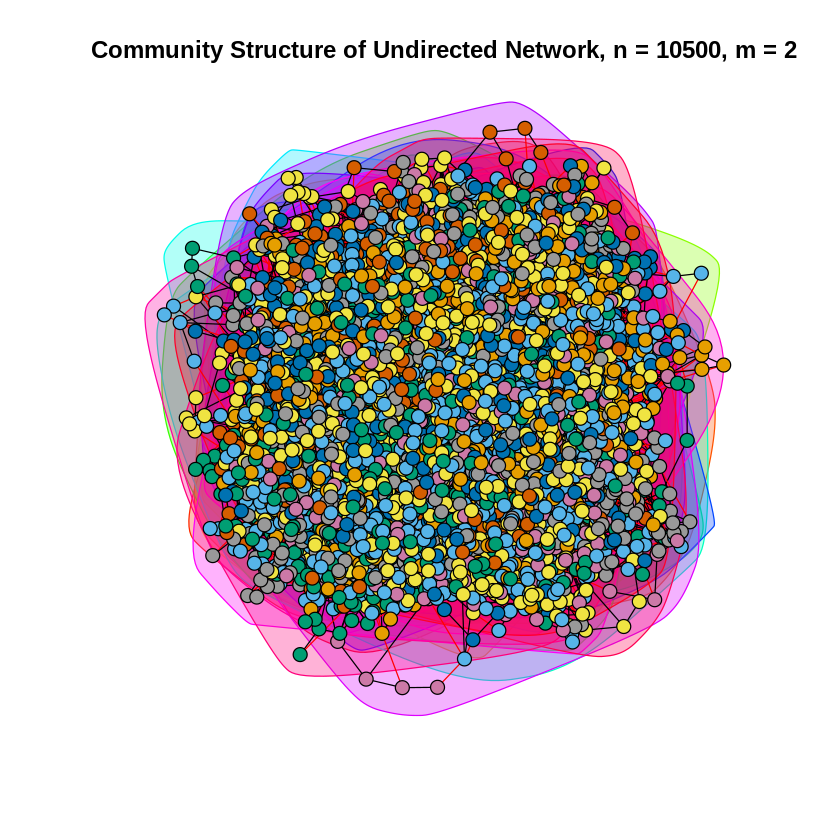

In [ ]:
# Generate larger network with 10,500 nodes using preferential attachment
larger_network <- barabasi.game(10500, m=2, directed=FALSE)

fg_communities <- cluster_fast_greedy(larger_network)
plot(fg_communities, larger_network, vertex.size=5, main="Community Structure of Undirected Network, n = 10500, m = 2", vertex.label=NA)

# 2. Measure Modularity
larger_modularity <- modularity(cluster_fast_greedy(larger_network))
cat("Modularity of Larger Network:", larger_modularity, "\n")

# 3. Compute Assortativity (e.g., degree assortativity)
larger_assortativity <- assortativity_degree(larger_network)
cat("Assortativity of Larger Network (Degree):", larger_assortativity, "\n")

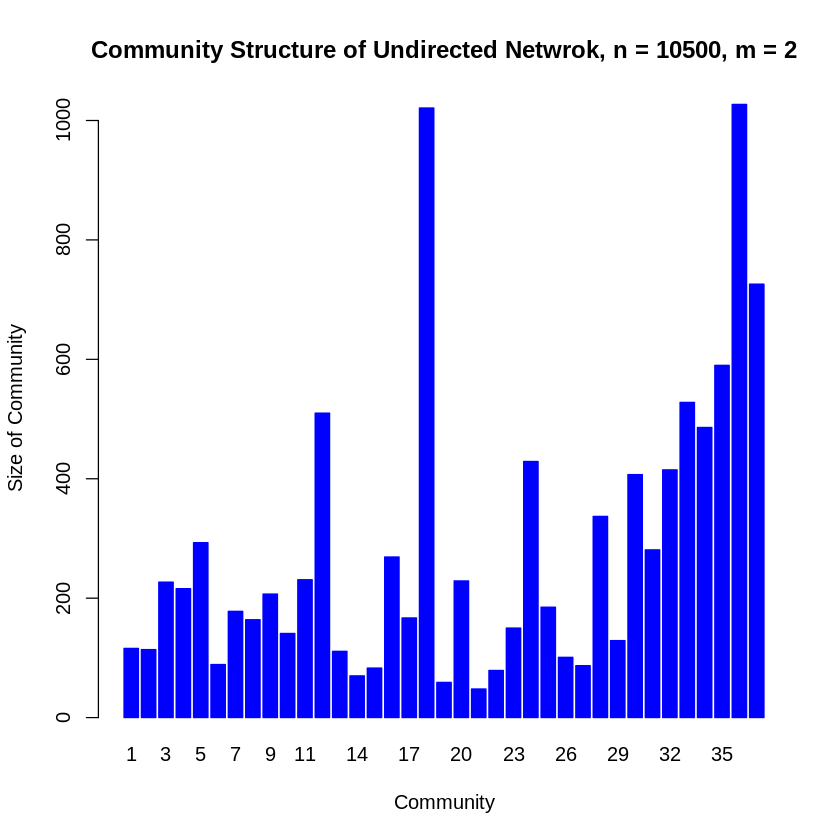

In [ ]:
#Bar plot for the community structure
barplot(as.vector(sizes(fg_communities)),names.arg = seq(1,length(fg_communities),1),main="Community Structure of Undirected Netwrok, n = 10500, m = 2",
   xlab="Community",ylab="Size of Community",ylim=c(0,max(as.vector(sizes(fg_communities)))+10),border="blue",col="blue")

Estimated slope for n = 1050 : -2.048647 
Estimated slope for n = 10500 : -2.281481 


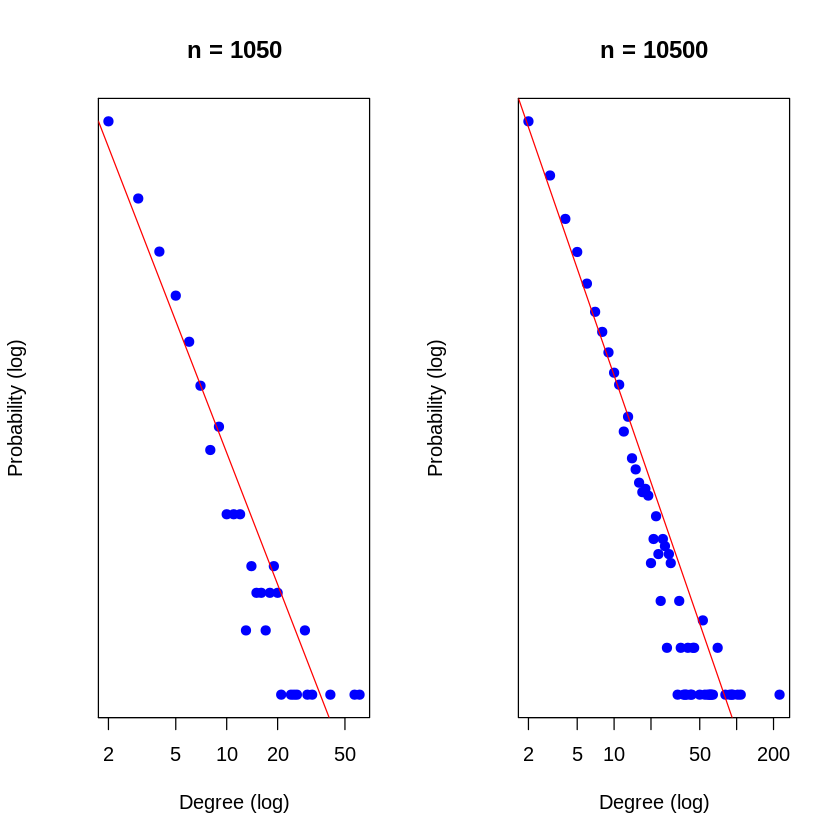

In [ ]:
#CHECK WHICH ONE OUT OF THE 2 IS BETTER. THIS OR NEXT CELL
# Function to plot degree distribution and estimate slope
plot_degree_distribution <- function(network, title) {
  deg <- degree(network, mode="all")
  deg.distribution <- table(deg)/length(deg)
  deg.distribution <- deg.distribution[deg.distribution > 0]

  plot(names(deg.distribution), deg.distribution,
       log="xy", xlab="Degree (log)", ylab="Probability (log)",
       main=title, pch=19, col="blue")

  # Linear regression to estimate the slope
  fit <- lm(log(deg.distribution) ~ log(as.numeric(names(deg.distribution))))
  abline(fit, col="red")

  cat("Estimated slope for", title, ":", coef(fit)[2], "\n")
}

# Generate networks
g1 <- barabasi.game(1050, m=2, directed=FALSE)
g2 <- barabasi.game(10500, m=2, directed=FALSE)

# Plot degree distribution and estimate slope
par(mfrow=c(1, 2)) # Plot side by side
plot_degree_distribution(g1, "n = 1050")
plot_degree_distribution(g2, "n = 10500")

Estimated slope for neighbors in Network n = 1050 : -1.096612 
Estimated slope for neighbors in Network n = 10500 : -1.379728 


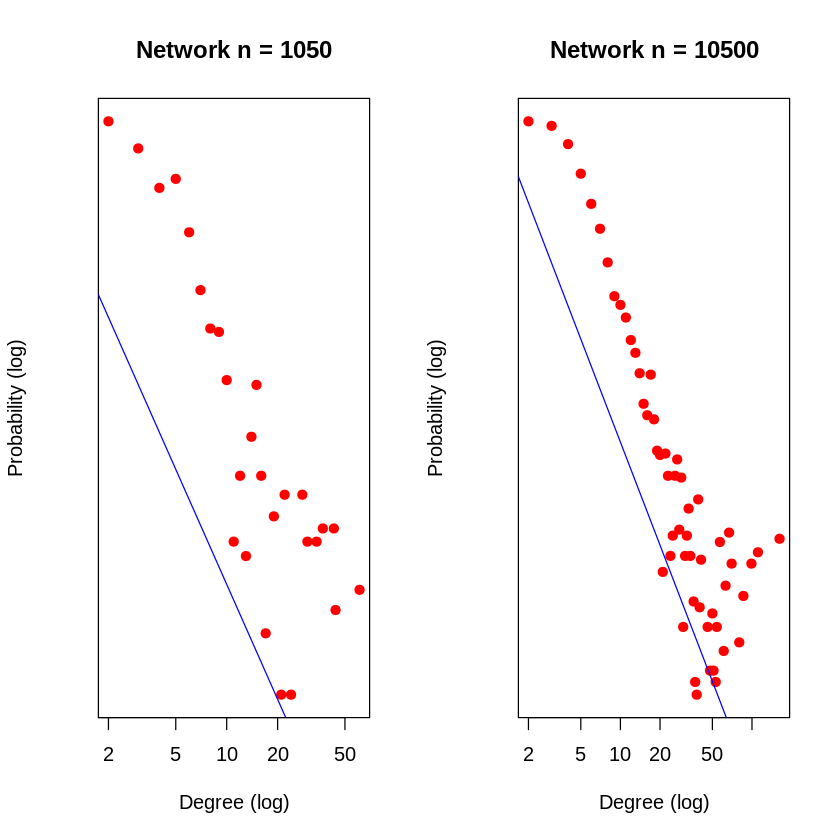

In [ ]:
# Function to sample neighbors and plot degree distribution
sample_and_plot_neighbors <- function(network, title) {
  degrees <- numeric()  # To store degrees of randomly picked neighbors

  for (i in 1:vcount(network)) {
    neighbors <- neighbors(network, i)
    if (length(neighbors) > 0) {
      j <- sample(neighbors, 1)
      degrees <- c(degrees, degree(network, j))
    }
  }

  deg.distribution <- table(degrees)/length(degrees)
  deg.distribution <- deg.distribution[deg.distribution > 0]

  plot(names(deg.distribution), deg.distribution,
       log="xy", xlab="Degree (log)", ylab="Probability (log)",
       main=title, pch=19, col="red")

  # Linear regression to estimate the slope
  fit <- lm(log(deg.distribution) ~ log(as.numeric(names(deg.distribution))))
  abline(fit, col="blue")

  cat("Estimated slope for neighbors in", title, ":", coef(fit)[2], "\n")
}

# Generate networks (if not already generated)
g1 <- barabasi.game(1050, m=2, directed=FALSE)
g2 <- barabasi.game(10500, m=2, directed=FALSE)

# Plot degree distribution of neighbors
par(mfrow=c(1, 2)) # Plot side by side
sample_and_plot_neighbors(g1, "Network n = 1050")
sample_and_plot_neighbors(g2, "Network n = 10500")

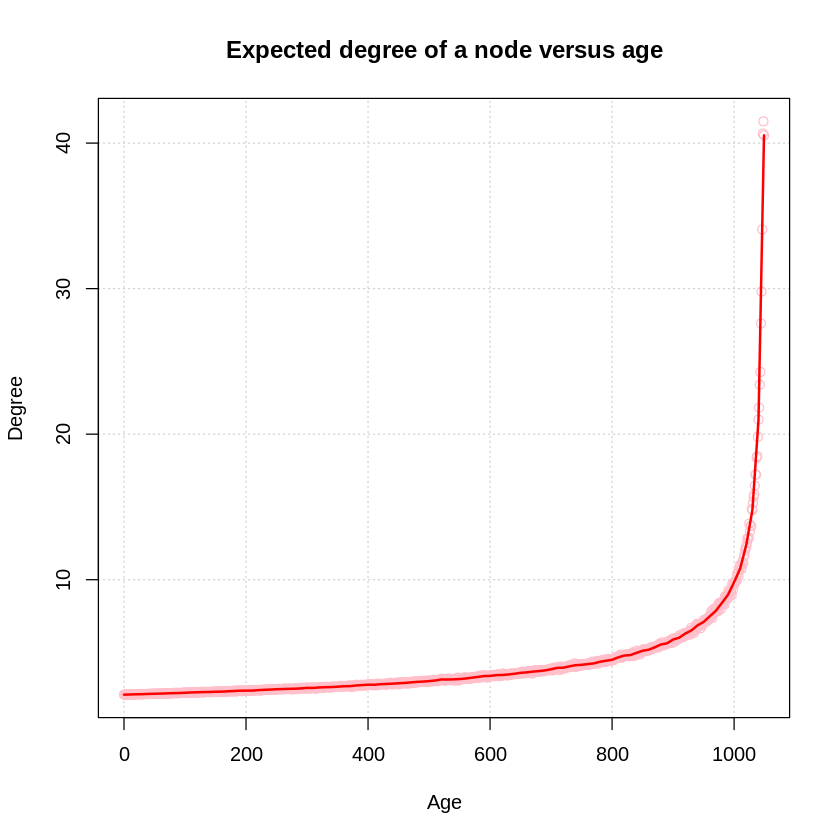

In [ ]:
#Creating a matrix to store the degree age
deg_age = matrix(data=0.0,nrow = 1050,ncol=1)
for (i in 1:1050) {
    g <- barabasi.game(1050, m=2, directed=FALSE)
    deg_age = deg_age+degree(g)
}
deg_age = deg_age/1000
plot(seq(1049,0,-1),deg_age,col='pink',ylab="Degree",xlab="Age",main="Expected degree of a node versus age",grid())
lines(lowess(seq(1049,0,-1),deg_age,f = 0.01), col="red",lwd = 2)

For m=6

[1] "Is the network connected? TRUE"


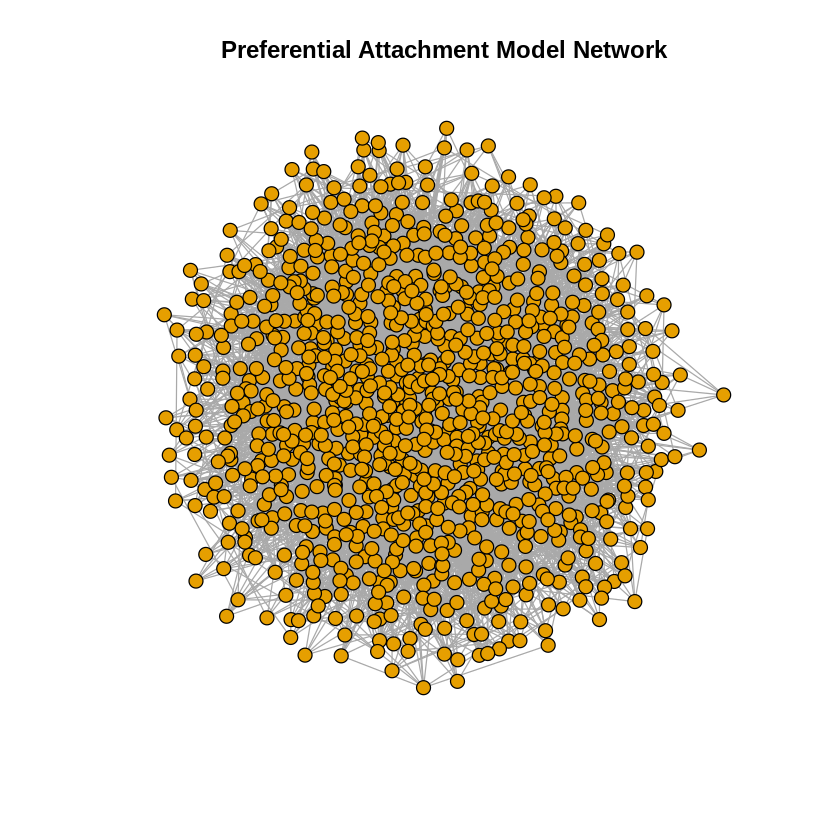

In [ ]:
#For m=6
# Set the seed for reproducibility
set.seed(0)

# Create an undirected network with 1050 nodes using the preferential attachment model
g <- barabasi.game(1050, m = 6, directed = FALSE)

# Check if the network is connected
is_connected <- is_connected(g)

# Plot the network (optional, can be commented out to speed up execution)
plot(g, vertex.size=5, vertex.label=NA, main="Preferential Attachment Model Network")

# Print the result
print(paste("Is the network connected?", is_connected))

In [ ]:
#Code to generate 100 graphs and check if they are connected
count = 0
for (i in 1:100) {
    g <- barabasi.game(1050, m=6, directed=FALSE)
    if (is_connected(g)) {
        count <- count + 1
    }
}
print(sprintf("Total iterations: 100, Connected graphs: %d",count))

[1] "Total iterations: 100, Connected graphs: 100"


Modularity: 0.2520199 
Degree Assortativity: -0.02376997 


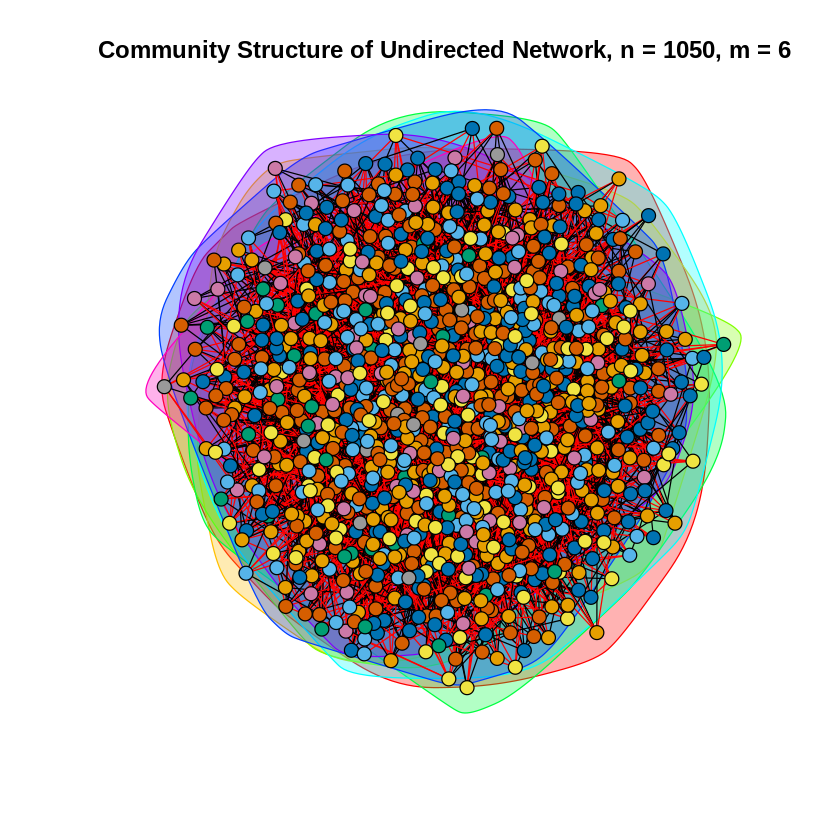

In [ ]:
# 1. Fast Greedy Community Detection
fg_communities <- cluster_fast_greedy(g)
plot(fg_communities, g, vertex.size=5, vertex.label=NA, main="Community Structure of Undirected Network, n = 1050, m = 6")

# 2. Measure Modularity
modularity_value <- modularity(fg_communities)
cat("Modularity:", modularity_value, "\n")

# 3. Compute Assortativity (for example, by degree)
degree_assortativity <- assortativity_degree(g)
cat("Degree Assortativity:", degree_assortativity, "\n")

# If you have a specific attribute for assortativity calculation, use:
# attribute_assortativity <- assortativity(g, attribute_vector, directed = FALSE)
# cat("Attribute Assortativity:", attribute_assortativity, "\n")

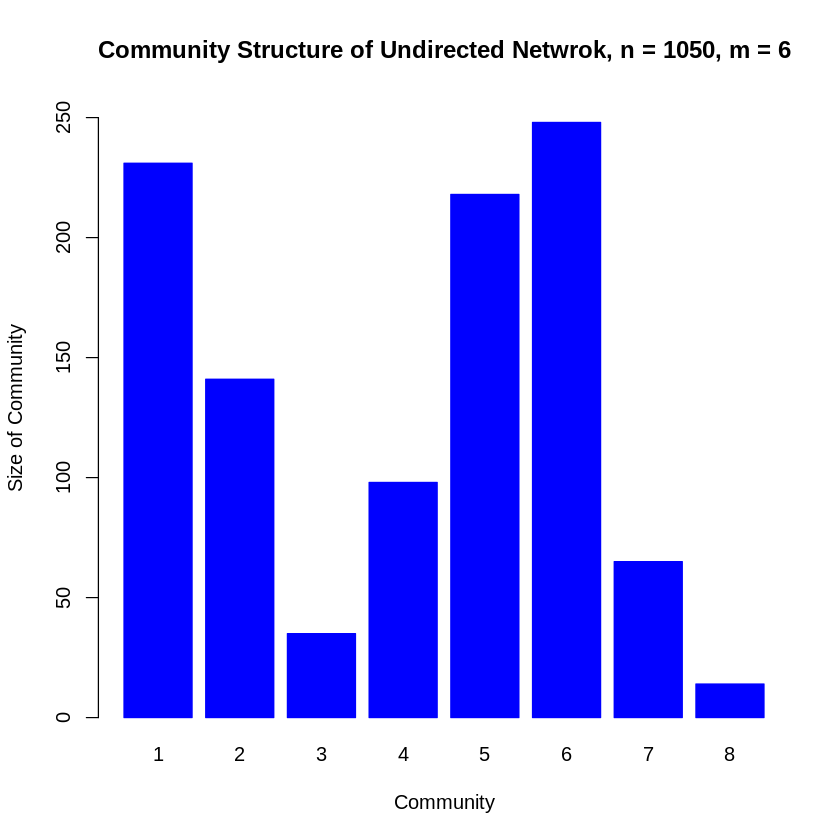

In [ ]:
#Bar plot for the community structure
barplot(as.vector(sizes(fg_communities)),names.arg = seq(1,length(fg_communities),1),main="Community Structure of Undirected Netwrok, n = 1050, m = 6",
   xlab="Community",ylab="Size of Community",ylim=c(0,max(as.vector(sizes(fg_communities)))+10),border="blue",col="blue")

Modularity of Larger Network: 0.2431556 
Assortativity of Larger Network (Degree): 0.002164367 


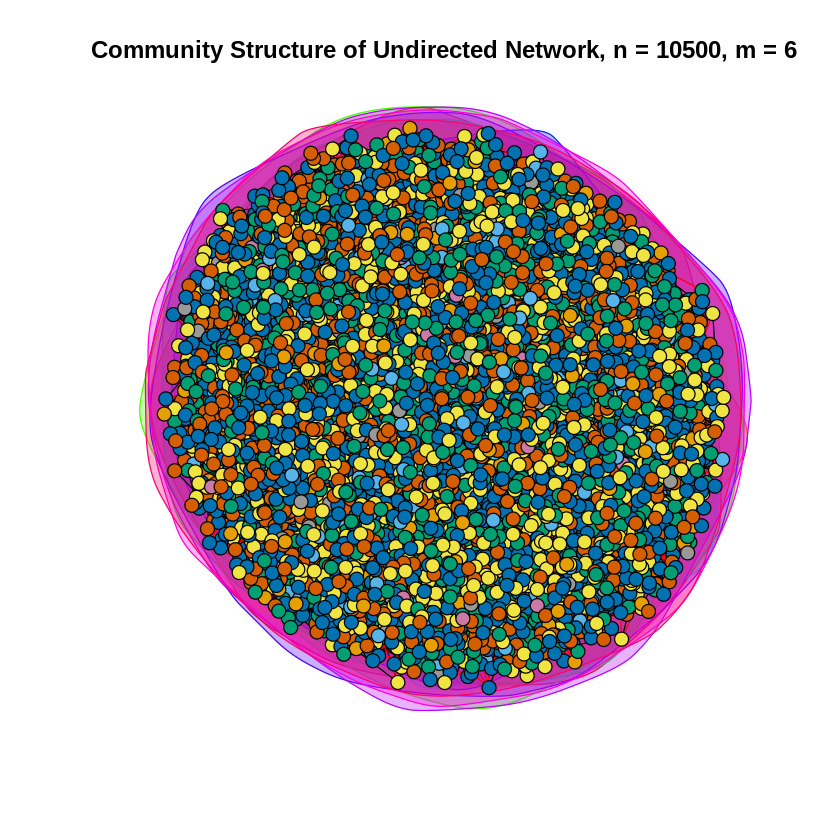

In [ ]:
# Generate larger network with 10,500 nodes using preferential attachment
larger_network <- barabasi.game(10500, m=6, directed=FALSE)

fg_communities <- cluster_fast_greedy(larger_network)
plot(fg_communities, larger_network, vertex.size=5, main="Community Structure of Undirected Network, n = 10500, m = 6", vertex.label=NA)

# 2. Measure Modularity
larger_modularity <- modularity(cluster_fast_greedy(larger_network))
cat("Modularity of Larger Network:", larger_modularity, "\n")

# 3. Compute Assortativity (e.g., degree assortativity)
larger_assortativity <- assortativity_degree(larger_network)
cat("Assortativity of Larger Network (Degree):", larger_assortativity, "\n")

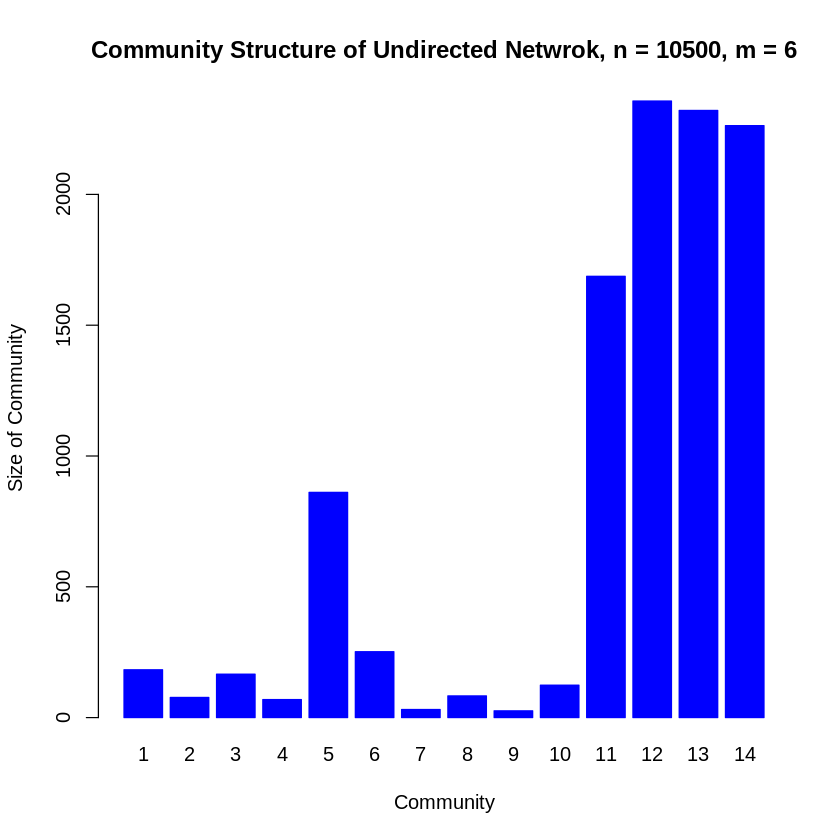

In [ ]:
#Bar plot for the community structure
barplot(as.vector(sizes(fg_communities)),names.arg = seq(1,length(fg_communities),1),main="Community Structure of Undirected Netwrok, n = 10500, m = 6",
   xlab="Community",ylab="Size of Community",ylim=c(0,max(as.vector(sizes(fg_communities)))+10),border="blue",col="blue")

Estimated slope for n = 1050 : -1.963338 
Estimated slope for n = 10500 : -2.173422 


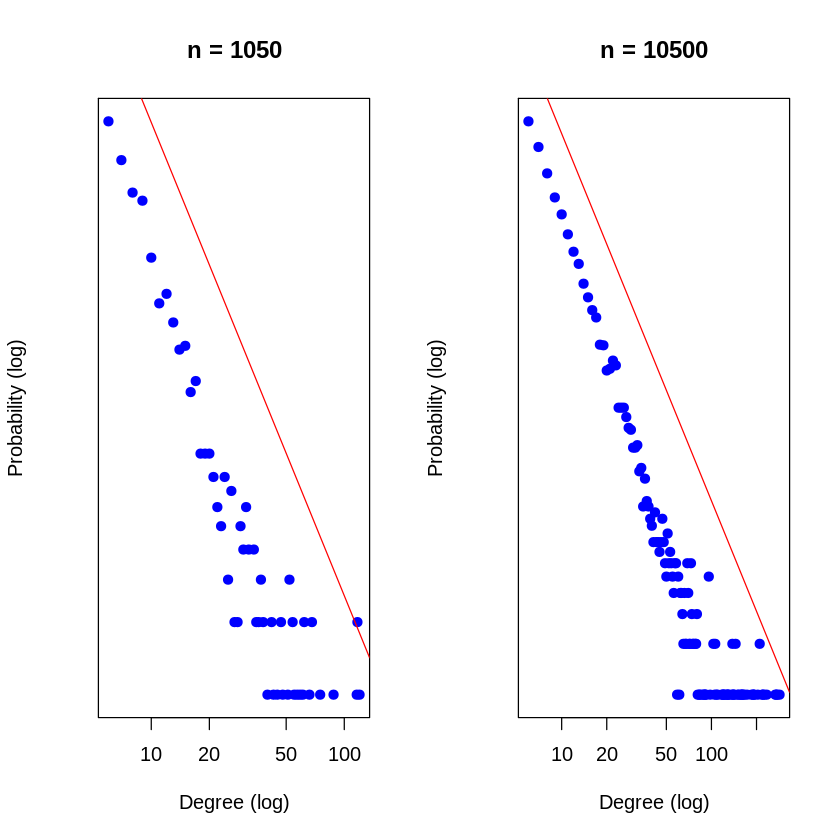

In [ ]:
#CHECK WHICH ONE OUT OF THE 2 IS BETTER. THIS OR NEXT CELL
# Function to plot degree distribution and estimate slope
plot_degree_distribution <- function(network, title) {
  deg <- degree(network, mode="all")
  deg.distribution <- table(deg)/length(deg)
  deg.distribution <- deg.distribution[deg.distribution > 0]

  plot(names(deg.distribution), deg.distribution,
       log="xy", xlab="Degree (log)", ylab="Probability (log)",
       main=title, pch=19, col="blue")

  # Linear regression to estimate the slope
  fit <- lm(log(deg.distribution) ~ log(as.numeric(names(deg.distribution))))
  abline(fit, col="red")

  cat("Estimated slope for", title, ":", coef(fit)[2], "\n")
}

# Generate networks
g1 <- barabasi.game(1050, m=6, directed=FALSE)
g2 <- barabasi.game(10500, m=6, directed=FALSE)

# Plot degree distribution and estimate slope
par(mfrow=c(1, 2)) # Plot side by side
plot_degree_distribution(g1, "n = 1050")
plot_degree_distribution(g2, "n = 10500")

Estimated slope for neighbors in Network n = 1050 : -1.050284 
Estimated slope for neighbors in Network n = 10500 : -1.189399 


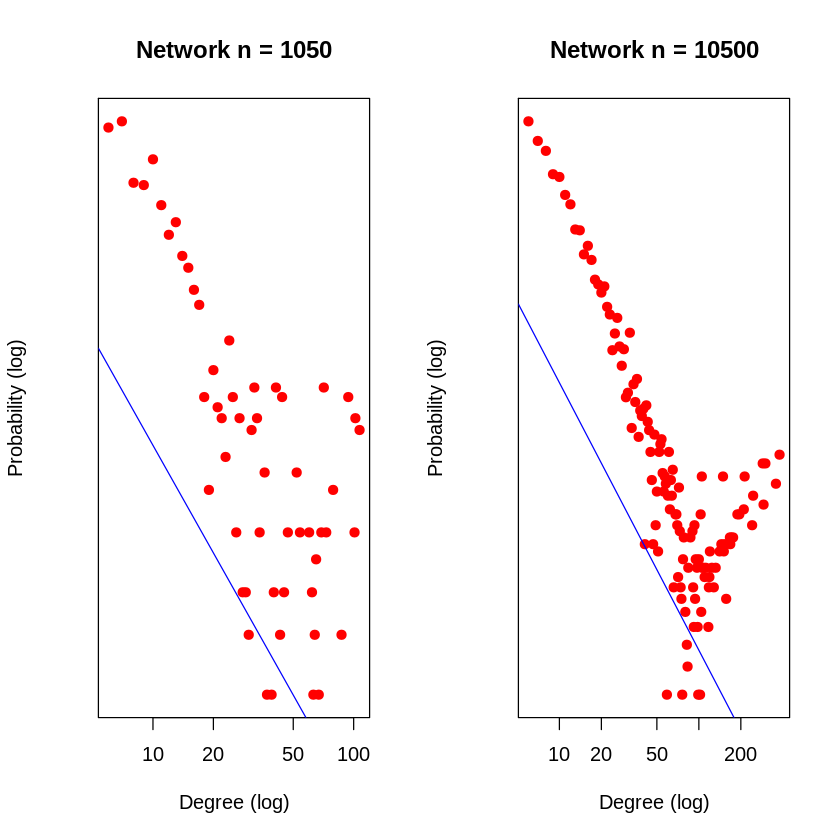

In [ ]:
# Function to sample neighbors and plot degree distribution
sample_and_plot_neighbors <- function(network, title) {
  degrees <- numeric()  # To store degrees of randomly picked neighbors

  for (i in 1:vcount(network)) {
    neighbors <- neighbors(network, i)
    if (length(neighbors) > 0) {
      j <- sample(neighbors, 1)
      degrees <- c(degrees, degree(network, j))
    }
  }

  deg.distribution <- table(degrees)/length(degrees)
  deg.distribution <- deg.distribution[deg.distribution > 0]

  plot(names(deg.distribution), deg.distribution,
       log="xy", xlab="Degree (log)", ylab="Probability (log)",
       main=title, pch=19, col="red")

  # Linear regression to estimate the slope
  fit <- lm(log(deg.distribution) ~ log(as.numeric(names(deg.distribution))))
  abline(fit, col="blue")

  cat("Estimated slope for neighbors in", title, ":", coef(fit)[2], "\n")
}

# Generate networks (if not already generated)
g1 <- barabasi.game(1050, m=6, directed=FALSE)
g2 <- barabasi.game(10500, m=6, directed=FALSE)

# Plot degree distribution of neighbors
par(mfrow=c(1, 2)) # Plot side by side
sample_and_plot_neighbors(g1, "Network n = 1050")
sample_and_plot_neighbors(g2, "Network n = 10500")

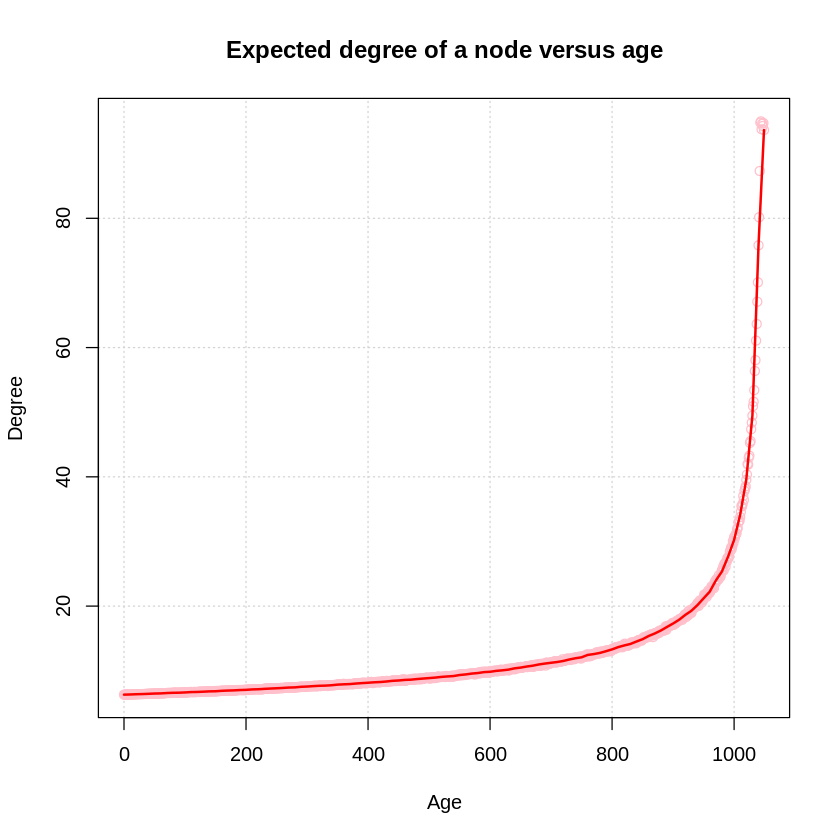

In [ ]:
deg_age = matrix(data=0.0,nrow = 1050,ncol=1)
for (i in 1:1050) {
    g <- barabasi.game(1050, m=6, directed=FALSE)
    deg_age = deg_age+degree(g)
}
deg_age = deg_age/1000
plot(seq(1049,0,-1),deg_age,col='pink',ylab="Degree",xlab="Age",main="Expected degree of a node versus age",grid())
lines(lowess(seq(1049,0,-1),deg_age,f = 0.01), col="red",lwd = 2)

(g) Repeat the previous parts (a-f) for m = 2, and m = 6. Compare the results of each
part for different values of m.

> For m=2 and m=6:
Refer to the networks above. The network is connected. We tried for 100 random networks and all were connected.

> For m=2:\
Using the fast greedy method, we get the above community structure for n=1050 and m=2. We get the below values:\
Modularity: 0.5217184\
Degree Assortativity: -0.04428939\
Using the fast greedy method, we get the above community structure for n=10500 and m=2. We get the below values:\
Modularity of Larger Network: 0.5322066\
Assortativity of Larger Network (Degree): -0.00721725\
For m=6:\
Using the fast greedy method, we get the above community structure for n=1050 and m=6. We get the below values:\
Modularity: 0.2520199\
Degree Assortativity: -0.02376997\
Using the fast greedy method, we get the above community structure for n=10500 and m=6. We get the below values:\
Modularity of Larger Network: 0.2431556\
Assortativity of Larger Network (Degree): 0.002164367\
We see that there are more communities in the network with a higher number of nodes (10500) compared to the smaller network (1050 nodes). In addition, the number of vertices in each community is significantly higher as well.\
We observe that as the value of m increases, the modularity index drops and the number of communities drop significantly, with a few communities having a large number of vertices. Intuitively, a higher value of m indicates that an incoming node is connected to a larger number of older nodes. While this should result in strong intra-community connectedness, the global sparsity among different communities is lost due to the connectedness requirement brought on by high values of , resulting in edges being formed among otherwise distinct clusters and hence weakening the community structures.

> For m=2:\
Above is the degree distribution in a log-log scale for both n = 1050, 10500. We get the slopes as below:\
Estimated slope for n = 1050 : -2.048647\
Estimated slope for n = 10500 : -2.281481\
For m=6:\
Above is the degree distribution in a log-log scale for both n = 1050, 10500. We get the slopes as below:\
Estimated slope for n = 1050 : -1.963338\
Estimated slope for n = 10500 : -2.173422\
The trends are roughly linear in the log-log scale. A larger network has more vertices to better approximate the power-law degree distribution for a preferential attachment model probabilistically over the smaller networks. Since a large network has a higher number of intra-community connections, the probability that the degree of a
randomly chosen nodes being bigger for large networks over small networks is high as well. We observe that as increases, the negative slope of the linear regression line decreases. This means that the degree distribution deviates from the preferential attachment model when incoming nodes are added to a larger number of older vertices. One way to explain this is that as increases, the expected degree of a node for the same degree increases.

> For m=2:\
Above is the plot of the degree distribution of nodes j that are picked with this process, in the log-log scale.\
Estimated slope for neighbors in Network n = 1050 : -1.096612\
Estimated slope for neighbors in Network n = 10500 : -1.379728\
For m=6:\
Above is the plot of the degree distribution of nodes j that are picked with this process, in the log-log scale.\
Estimated slope for neighbors in Network n = 1050 : -1.050284\
Estimated slope for neighbors in Network n = 10500 : -1.189399\
The distributions are roughly linear. : We observe that as m increases, the negative slope of the linear regression line decreases. This means that the degree distribution deviates from the preferential attachment model when incoming nodes are added to a larger number of older vertices. The explanation is similar as for the overall degree distribution. As m increases, the expected degree of a randomly selected node for the
same degree increases.

> For m=2 and m=6:\
Above is the plot which shows the relationship between the age of nodes and their expected degree. For all values of m, we see that the expected degree of a node increases monotonically as it gets older. This is expected because in preferential attachment models, nodes with higher degrees or connectedness are more likely to receive edges with newer nodes. Since older nodes are more likely to be connected with newer nodes with time, the degree of older nodes increases with each timestep. As m increases, the expected degree for the same node for the same age increases.










### Question 2 (h)

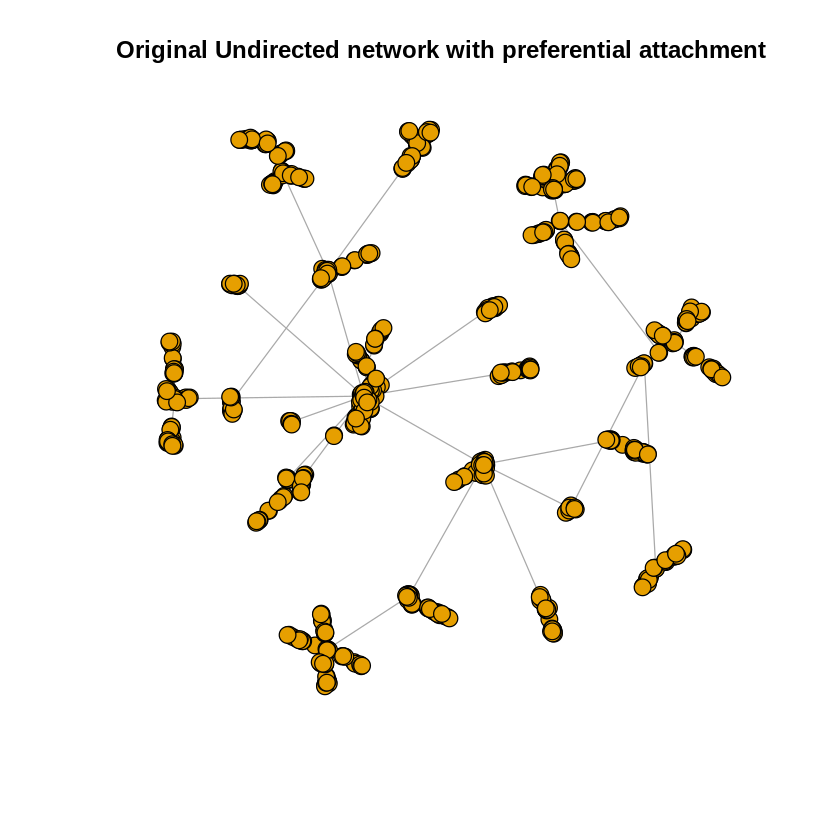

[1] "Modularity of the original community structure is 0.928853"


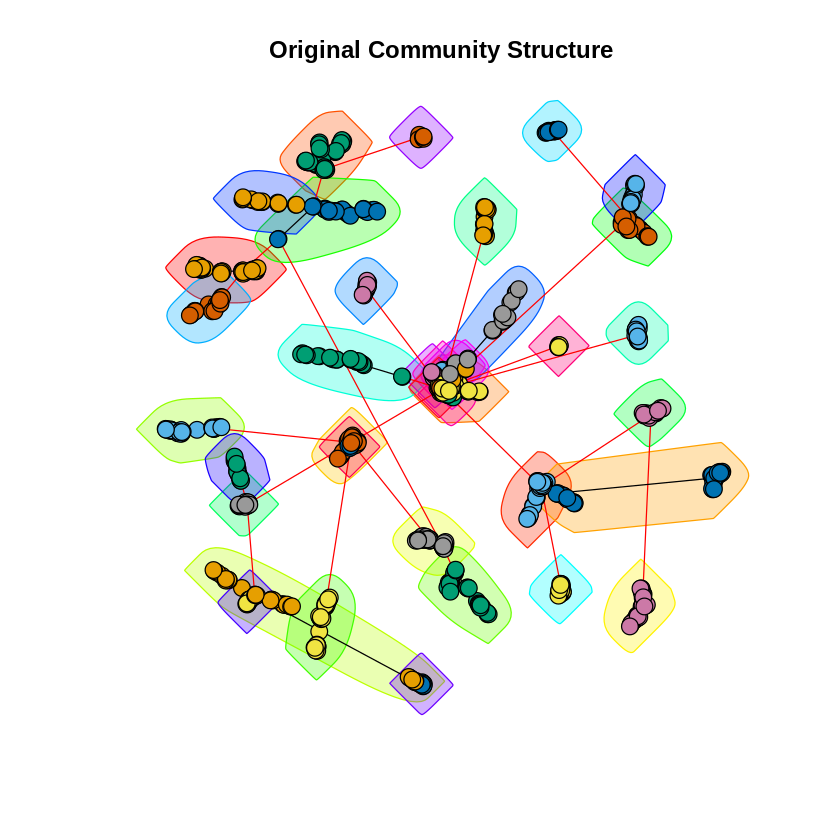

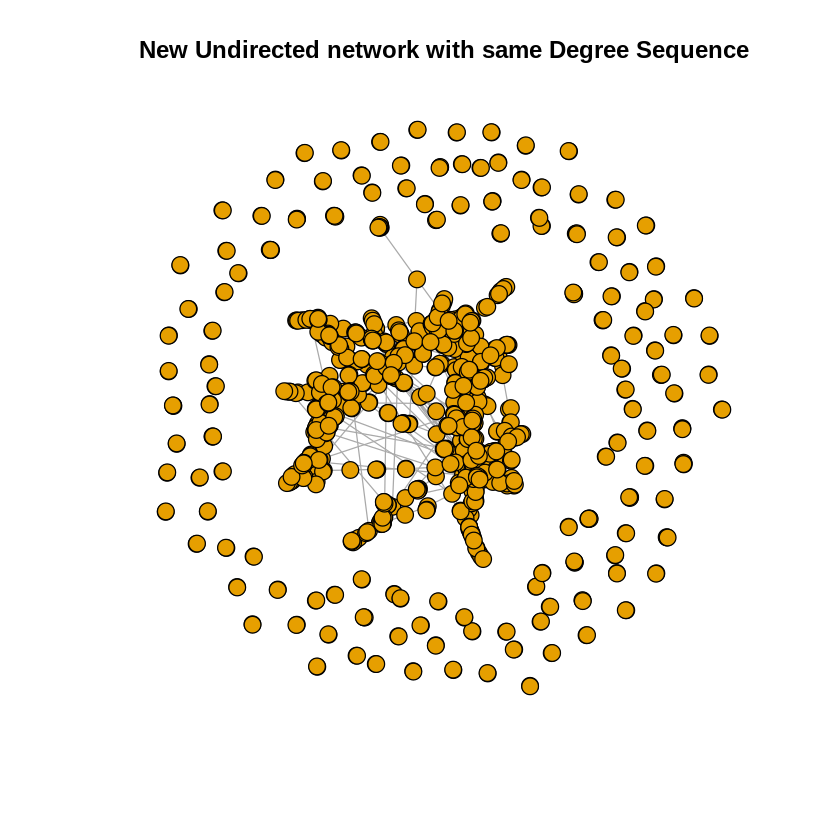

[1] "Modularity of the new community structure is 0.836678"


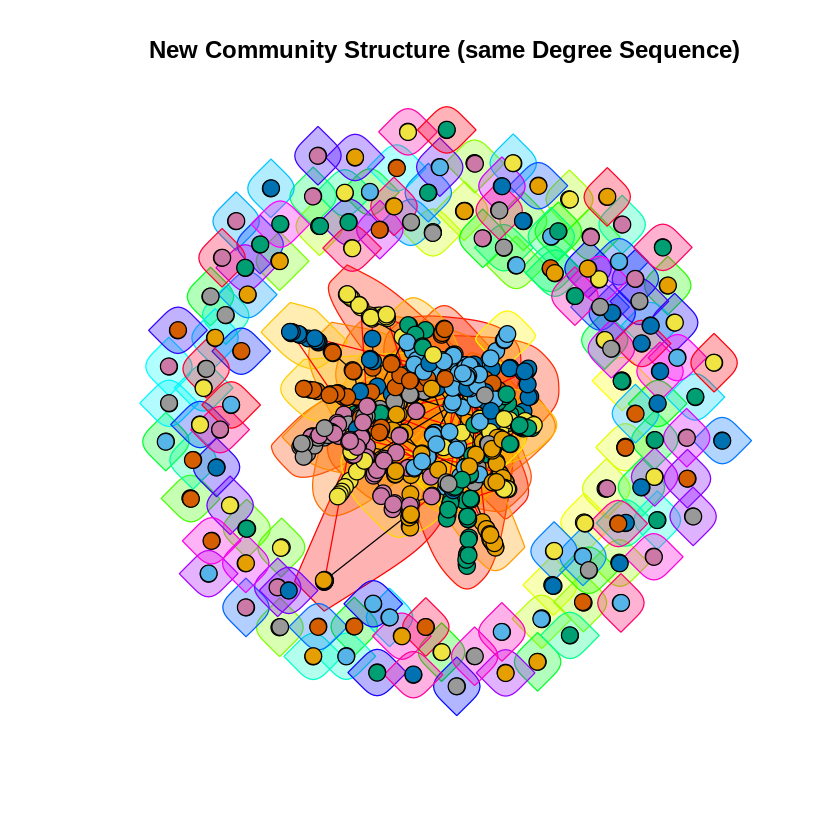

In [ ]:
n = 1050
m = 1
g1 = sample_pa(n, m=m, directed=F)
#Plotting the graph with preferential attachment
plot(g1, vertex.size=6, main = "Original Undirected network with preferential attachment ", vertex.label="")

g1_comm = cluster_fast_greedy(g1)
g1_mod = modularity(g1_comm)
plot(g1_comm, g1, vertex.size=6, main="Original Community Structure ", vertex.label="")

print(sprintf("Modularity of the original community structure is %f", g1_mod))


degree_g1 = degree(g1)
g2 = sample_degseq(degree_g1, method="simple.no.multiple")
#Plotting the new community structure
plot(g2, vertex.size=6, main = "New Undirected network with same Degree Sequence", vertex.label="")

g2_comm = cluster_fast_greedy(g2)
g2_mod = modularity(g2_comm)
plot(g2_comm, g2, vertex.size=6, main="New Community Structure (same Degree Sequence)", vertex.label="")

print(sprintf("Modularity of the new community structure is %f", g2_mod))

(h) Again, generate a preferential attachment network with n = 1050, m = 1. Take its
degree sequence and create a new network with the same degree sequence, through
stub-matching procedure. Plot both networks, mark communities on their plots,
and measure their modularity. Compare the two procedures for creating random
power-law networks.
Hint In case that fastgreedy community detection fails because of self-loops, you
may use “walktrap” community detection.
Useful function(s): sampledegseq

> Refer to the networks above.\
The modularities are as below:\
Modularity of the original community structure is 0.928853\
Modularity of the new community structure is 0.836678\
The simple, no multiple method avoids multiple and loop edges and restarts the generation from scratch if loops are detected. Fast greedy community detection works on this method but the method does not guarantee uniform sampling from the space of all possible graphs. In stub-matching from degree sequences, we randomly sample numbers from the degree distribution of our
choice, e.g. power law degree distribution to get the nodes of the network along with their degrees. The value of the ith sample is the degree of the ith node. Afterwards, we randomly match the stubs to connect the vertices
of the network by edges. we observe that a significant number of vertices for the network generated via stub-matching are unconnected and forming their own communities, while the network generated via preferential attachment model show local regions of high-connectedness with sparse connections among
individual communities. The number of communities are also significantly higher for stub-matching over preferential attachment. This is reflected in the modularity indices of the networks, with preferential attachment
models having a higher modularity than stub-matching models, indicating that the preferential attachment network is better capable of being partitioned into communities with strong intra-community connectedness and sparse inter-community connectedness over stub-matching networks. In addition, since each new node is always attached to a connected node in the existing network for preferential attachment models, the final network is always guaranteed to be connected by construction. However, this is not the case for stub-matching
from degree sequence, as the process is random and does not necessarily require connection to older nodes. Furthermore, stub-matching can lead to the formation of loops, which can make community detection difficult
using greedy procedures. The only advantage of stub-matching is the level of control over the degree sequence that the user has, allowing the user to generate networks with custom degree distributions.


## 3. Create a modified preferential attachment model that penalizes the age of a node

### Question 3 (a)

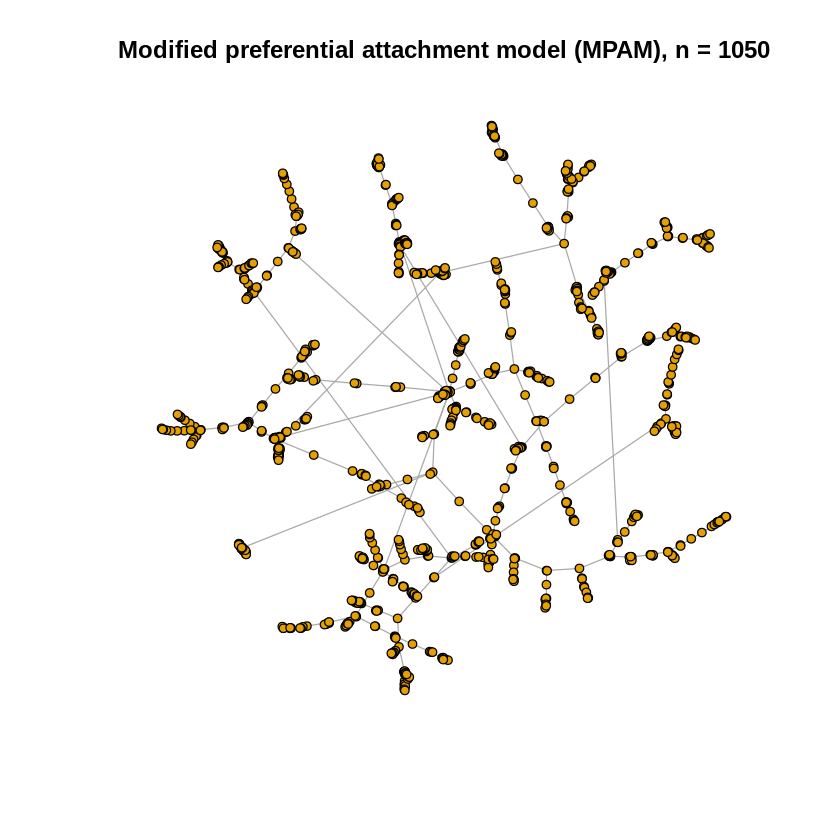

In [ ]:
#With n=1050 and m=1
g <- sample_pa_age(n=1050, directed = FALSE, m=1, pa.exp=1, aging.exp=-1,
                   zero.deg.appeal = 1, zero.age.appeal = 0, deg.coef = 1, age.coef = 1)
plot(g,vertex.label="",vertex.size=3,main = "Modified preferential attachment model (MPAM), n = 1050")

[1] "Slope and intercept for MPAM:"

Call:
lm(formula = dist_1 ~ deg_1)

Coefficients:
(Intercept)        deg_1  
      2.780       -3.264  



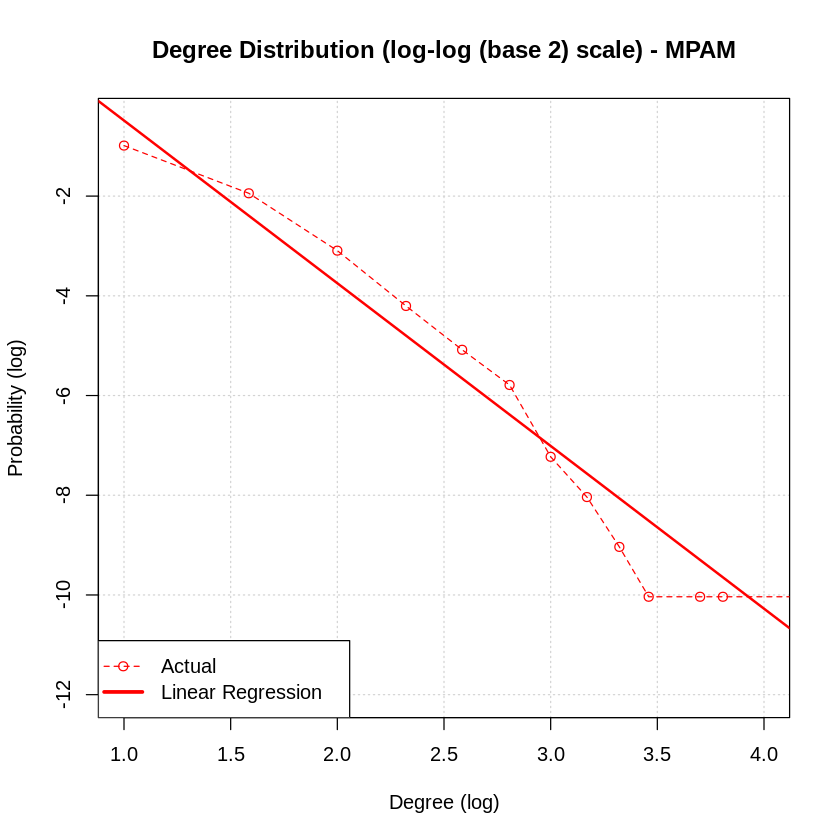

In [ ]:
#Finding the degree distribution
deg_dist_1 = degree_distribution(g)
deg_1 <- log2(c(1:length(deg_dist_1)))[which(deg_dist_1 !=0, arr.ind = TRUE)]
dist_1 <- log2(deg_dist_1)[which(deg_dist_1 !=0, arr.ind = TRUE)]
#Plotting it
plot(deg_1,dist_1,main="Degree Distribution (log-log (base 2) scale) - MPAM",
     xlab="Degree (log)",ylab="Probability (log)",grid(),col="red",ylim=c(-12,-0.5),xlim=c(1,4))
lines(deg_1,dist_1,lty=2,col="red")
abline(lm(dist_1 ~ deg_1),col="red",lwd=2)

legend('bottomleft', legend = c("Actual","Linear Regression"),
       lty = c(2, 1), lwd = c(1,3), pch=c(1,NA),
       col = c('red','red'))
print("Slope and intercept for MPAM:")
print(lm(dist_1 ~ deg_1))

(a) Each time a new vertex is added, it creates m links to old vertices and the probability
that an old vertex is cited depends on its degree (preferential attachment) and age.
In particular, the probability that a newly added vertex connects to an old vertex is
proportional to:
P[i] ∼ (ckα
i + a)(dlβ
i + b),
where ki
is the degree of vertex i in the current time step, and li
is the age of vertex
i. Produce such an undirected network with 1050 nodes and parameters m = 1,
α = 1, β = −1, and a = c = d = 1, b = 0. Plot the degree distribution. What is the
power law exponent?
Hint Useful function(s): samplepaage

> Refer to the plot above. The slope of the plot is -3.264. Therefore the power law exponent is 3.264. We observe that the degree
distribution is much more linear than vanilla preferential attachment models in the log-log scale, with a lower value on the upper bound of the expected degree of the node. This means that the
modified preferential attachment model gives rise to a sparse network with a finite number of high-degree nodes and a degree-distribution tail that is not as heavy as vanilla preferential attachment models.

### Question 3 (b)

[1] "Modularity: 0.936313216727357"


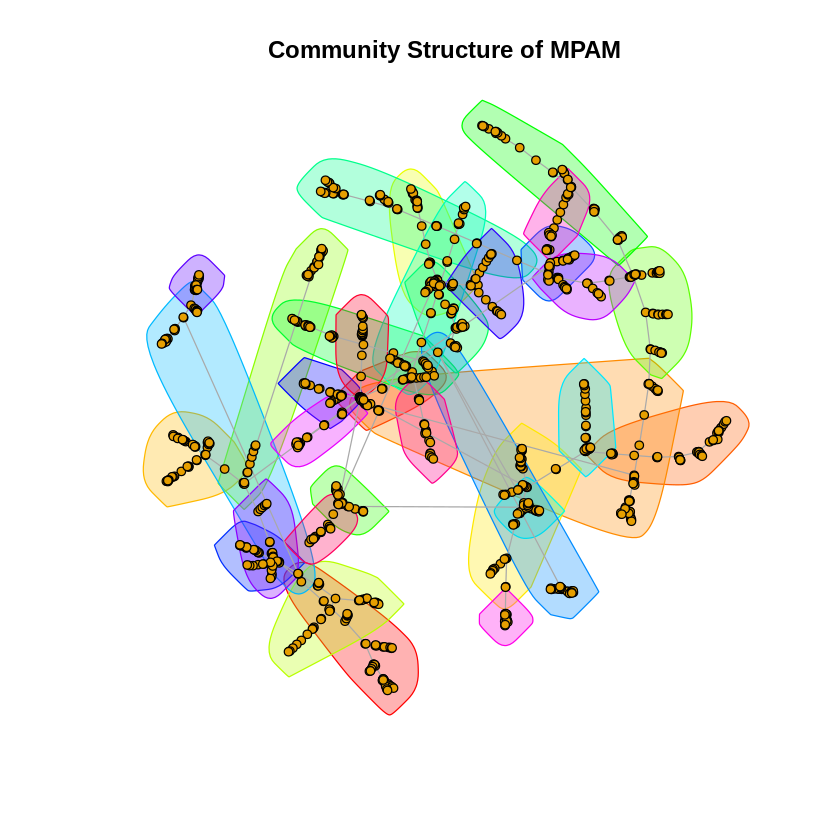

In [ ]:
# Use fast greedy method to find community structure
communities <- cluster_fast_greedy(g)

# Get modularity
modularity <- modularity(communities)

plot(g, mark.groups = groups(communities), vertex.size=3, vertex.label="",main="Community Structure of MPAM")


print(paste("Modularity:", modularity))

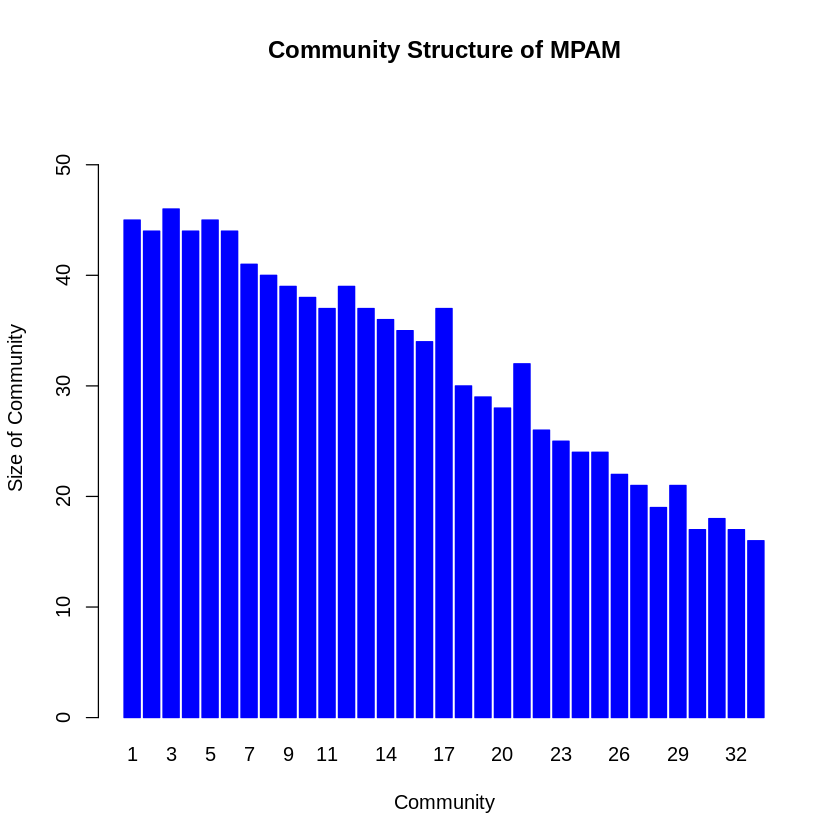

In [ ]:
barplot(as.vector(sizes(communities)),names.arg = seq(1,length(communities),1),main="Community Structure of MPAM",
   xlab="Community",ylab="Size of Community",ylim=c(0,max(as.vector(sizes(communities)))+10),border="blue",col="blue")

(b) Use fast greedy method to find the community structure. What is the modularity?
> Refer to the plots above. The modularity is 0.936313216727357. We see that the number of vertices in each community are much more homogeneous for the modified model over vanilla preferential attachment networks. This is expected as the modified model penalizes the network generator from selecting nodes that are too old and encourages attachment of incoming nodes to moderately aged nodes, yielding clusters with homogenous number of nodes.